# Введение

## Цель работы
Провести анализ рынка недвижимости Санкт-Петербурга и Ленинградской области с целью выявления факторов, влияющих на стоимость квартир.
На основе анализа определить типичный портрет продаваемой квартиры и выявить закономерности ценообразования.

## План работы
1. Предобработка данных:
  - Исправление ошибок в данных (пропуски, аномалии, дубликаты).
  - Приведение данных к нужным типам.
  - Добавление новых признаков для удобства анализа.
2. Исследовательский анализ данных:
  - Анализ распределения основных параметров квартир (площадь, цена, количество комнат и т.д.).
  - Определение зависимости цены от различных факторов (площадь, этаж, расположение и т.д.).
  - Выявление закономерностей и особенностей рынка недвижимости в разных районах.
3. Формулирование выводов и рекомендаций:
  - Описание типичного портрета продаваемой квартиры.
  - Определение ключевых факторов, влияющих на стоимость квартир.
  - Рекомендации для покупателей и продавцов недвижимости.

## Описание данных:
Данные представляют собой информацию о продаже квартир в Санкт-Петербурге и Ленинградской области, собранную за период с 2014 по 2019 год.
В датасете содержатся следующие характеристики квартир:
- общая площадь, жилая площадь, площадь кухни;
- количество комнат;
- этаж, общее количество этажей в доме;
- расстояние до центра города, аэропорта, ближайшего парка;
- цена, цена за квадратный метр;
- дата публикации объявления;
- и другие параметры.

# Обзор данных

In [1]:
%%capture
!pip install fuzzywuzzy
!pip install python-Levenshtein

In [2]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [4]:
pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:.2f}'.format

## Пример данных

In [5]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13280,11,5300000.00,58.00,2016-03-29T00:00:00,3,NaN,5.00,38.30,3,False,...,7.00,0.00,Санкт-Петербург,9708.00,11460.00,0.00,NaN,0.00,NaN,170.00
21039,10,6750000.00,63.20,2014-12-08T00:00:00,2,NaN,18.00,37.20,8,NaN,...,10.20,0.00,Санкт-Петербург,28959.00,10890.00,1.00,212.00,0.00,NaN,781.00
4976,10,12300000.00,70.00,2018-01-12T00:00:00,2,NaN,17.00,34.00,15,NaN,...,13.90,5.00,Санкт-Петербург,10620.00,12064.00,1.00,513.00,1.00,671.00,185.00
16286,9,1400000.00,42.50,2019-01-24T00:00:00,2,NaN,3.00,18.60,1,NaN,...,7.03,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,95.00
16842,9,6300000.00,45.50,2018-11-21T00:00:00,1,3.50,4.00,25.60,3,NaN,...,12.00,NaN,Санкт-Петербург,22519.00,4870.00,1.00,343.00,0.00,NaN,89.00
1139,16,5000000.00,42.70,2017-04-29T00:00:00,1,2.70,14.00,18.60,5,False,...,11.70,1.00,Санкт-Петербург,11270.00,12720.00,0.00,NaN,0.00,NaN,52.00
5852,8,2890000.00,36.00,2017-08-03T00:00:00,1,NaN,11.00,18.70,8,NaN,...,7.10,NaN,Колпино,27311.00,33097.00,0.00,NaN,0.00,NaN,213.00
22949,10,1900000.00,65.40,2018-07-05T00:00:00,3,2.60,5.00,NaN,1,NaN,...,NaN,NaN,поселок Елизаветино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
16554,1,3300000.00,46.00,2017-04-05T00:00:00,2,NaN,5.00,30.00,2,NaN,...,7.00,0.00,Санкт-Петербург,24983.00,14879.00,0.00,NaN,0.00,NaN,109.00
23162,5,3180000.00,30.00,2018-03-30T00:00:00,1,2.60,9.00,15.20,1,NaN,...,7.00,NaN,Санкт-Петербург,13247.00,15838.00,0.00,NaN,0.00,NaN,56.00


## Описание колонок

| Колонка | Старое название | Описание |
|---|---|---|
| `dist_to_airport_m` | `airports_nearest` | расстояние до ближайшего аэропорта в метрах (м) |
| `num_balconies` | `balcony` | число балконов |
| `ceiling_height_m` | `ceiling_height` | высота потолков (м) |
| `dist_to_center_m` | `cityCenters_nearest` | расстояние до центра города (м) |
| `days_exposed` | `days_exposition` | сколько дней было размещено объявление (от публикации до снятия) |
| `pub_datetime` | `first_day_exposition` | дата публикации |
| `floor_num` | `floor` | этаж |
| `num_floors` | `floors_total` | всего этажей в доме |
| `is_apartment` | `is_apartment` | апартаменты (булев тип) |
| `kitchen_area_sqm` | `kitchen_area` | площадь кухни в квадратных метрах (м²) |
| `last_price` | `last_price` | цена на момент снятия с публикации |
| `living_area_sqm` | `living_area` | жилая площадь в квадратных метрах (м²) |
| `locality_name` | `locality_name` | название населённого пункта |
| `is_open_plan` | `open_plan` | свободная планировка (булев тип) |
| `num_parks_3km` | `parks_around3000` | число парков в радиусе 3 км |
| `dist_to_park_m` | `parks_nearest` | расстояние до ближайшего парка (м) |
| `num_ponds_3km` | `ponds_around3000` | число водоёмов в радиусе 3 км |
| `dist_to_pond_m` | `ponds_nearest` | расстояние до ближайшего водоёма (м) |
| `num_rooms` | `rooms` | число комнат |
| `is_studio` | `studio` | квартира-студия (булев тип) |
| `total_area_sqm` | `total_area` | общая площадь квартиры в квадратных метрах (м²) |
| `num_images` | `total_images` | число фотографий квартиры в объявлении |
| `pub_datetime` | - | дата публикации. получено из `pub_date` |
| `pub_dow` | - | день недели публикации (Day Of Week); 0 — понедельник, 1 — вторник и т.д. |
| `pub_month` | - | месяц публикации |
| `pub_year` | - | год публикации |
| `price_per_sqm` | - | цена за квадратный метр; `= last_price / total_area_sqm` |
| `dist_to_center_km` | - | расстояние до центра города в километрах; `= dist_to_center_m * 1000` |
| `floor_type` | - | тип этажа квартиры (значения — "первый", "последний", "другой"); |
| `price_mln` | - | цена в миллионах рублей; `= last_price / 1e6` |


In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Наименование полей следует скорректировать.

В некоторых полях есть значительные пропуски.

Некоторые поля имеют неверный тип данных. Например, количество балконов `balcony` может быть только целочисленным.   

## Описание данных

In [7]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Есть аномальные значения.  
`ceiling_height` = 1 | 100  
`rooms` = 0  
`airports_nearest` = 0  

## Дубликаты

In [8]:
df.duplicated().sum()

0

Явных дубликатов нет.

## Гистограммы числовых столбцов таблицы

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

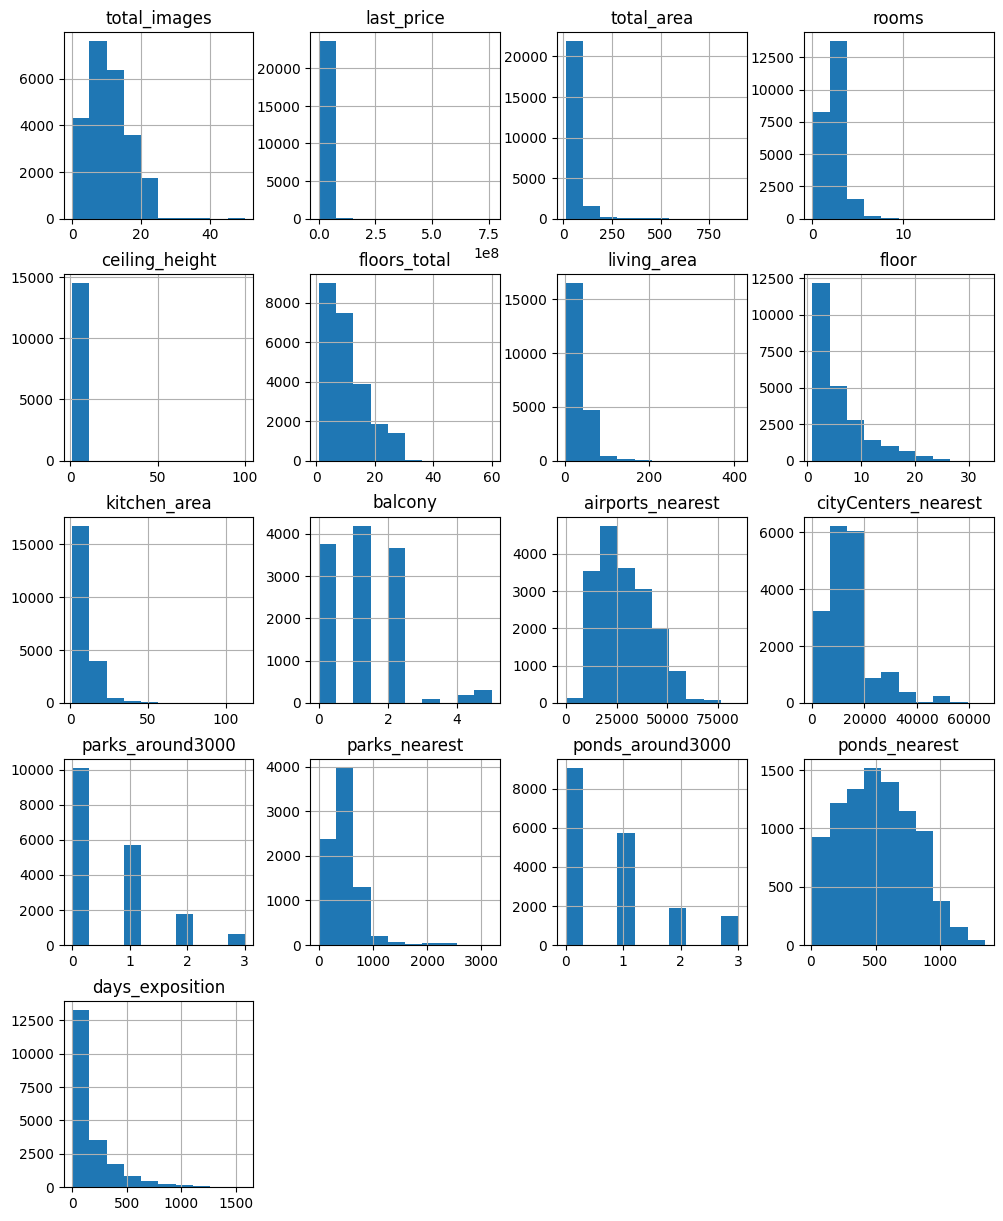

In [9]:
df.hist(figsize=(12, 15))

## Выводы

Таблица содержит данные о квартирах. Всего есть 23699 записей о квартирах.

Наименование полей следует скорректировать. Некоторые поля имеют неверный тип данных. Есть аномальные значения. Явных дубликатов нет. Гистограммы выглядят естественно.

Данных достаточно для анализа.

# Предобработка данных

## Переименование колонок

In [10]:
df = df.rename(
    columns = {
        'total_images': 'num_images',
        'last_price': 'last_price',
        'total_area': 'total_area_sqm',
        'first_day_exposition': 'pub_datetime',
        'rooms': 'num_rooms',
        'ceiling_height': 'ceiling_height_m',
        'floors_total': 'num_floors',
        'living_area': 'living_area_sqm',
        'floor': 'floor_num',
        'is_apartment': 'is_apartment',
        'studio': 'is_studio',
        'open_plan': 'is_open_plan',
        'kitchen_area': 'kitchen_area_sqm',
        'balcony': 'num_balconies',
        'locality_name': 'locality_name',
        'airports_nearest': 'dist_to_airport_m',
        'cityCenters_nearest': 'dist_to_center_m',
        'parks_around3000': 'num_parks_3km',
        'parks_nearest': 'dist_to_park_m',
        'ponds_around3000': 'num_ponds_3km',
        'ponds_nearest': 'dist_to_pond_m',
        'days_exposition': 'days_exposed',
    }
)
df.columns

Index(['num_images', 'last_price', 'total_area_sqm', 'pub_datetime',
       'num_rooms', 'ceiling_height_m', 'num_floors', 'living_area_sqm',
       'floor_num', 'is_apartment', 'is_studio', 'is_open_plan',
       'kitchen_area_sqm', 'num_balconies', 'locality_name',
       'dist_to_airport_m', 'dist_to_center_m', 'num_parks_3km',
       'dist_to_park_m', 'num_ponds_3km', 'dist_to_pond_m', 'days_exposed'],
      dtype='object')

## Удаление пропусков

In [11]:
df.isna().sum().sort_values(ascending=False)

,0
is_apartment,20924
dist_to_park_m,15620
dist_to_pond_m,14589
num_balconies,11519
ceiling_height_m,9195
dist_to_airport_m,5542
dist_to_center_m,5519
num_ponds_3km,5518
num_parks_3km,5518
days_exposed,3181


In [12]:
(df.isna().mean()*100).sort_values(ascending=False)

,0
is_apartment,88.29
dist_to_park_m,65.91
dist_to_pond_m,61.56
num_balconies,48.61
ceiling_height_m,38.80
dist_to_airport_m,23.38
dist_to_center_m,23.29
num_ponds_3km,23.28
num_parks_3km,23.28
days_exposed,13.42


### num_floors

Колонка `num_floors` в некоторых случаях не заполнена, хотя указан этаж квартры. Скорее всего, эти пропуски полностью случайны, возникли при вводе данных. Пропусков мало, удаляем.

In [13]:
df[(df['num_floors'].isna())]['last_price'].count()

86

In [14]:
df = df[~df['num_floors'].isna()]

### num_balconies
Если количество балконов не указано, считаем, что балконов нет.

In [15]:
df['num_balconies'] = df['num_balconies'].fillna(0)

### is_apartment
Если пропущено значение `is_apartment` считаем, что это не апартаменты.

In [16]:
df['is_apartment'] = df['is_apartment'].fillna(False)

### parks, ponds
Если количество парков и прудов не указано, считаем, что их нет.

Колонки `dist_to_park_m` и `dist_to_pond_m` не противоречат колонкам `num_parks_3km` и `num_ponds_3km`.


In [17]:
df['num_parks_3km'] = df['num_parks_3km'].fillna(False)
df['num_ponds_3km'] = df['num_ponds_3km'].fillna(False)

In [18]:
print(df[(df['dist_to_park_m'] <= 3000) & (df['num_parks_3km'] == False)]['last_price'].count())
print(df[(df['dist_to_pond_m'] <= 3000) & (df['num_ponds_3km'] == False)]['last_price'].count())
print(df[(df['dist_to_park_m'] > 3000) & (df['num_parks_3km'] == True)]['last_price'].count())
print(df[(df['dist_to_pond_m'] > 3000) & (df['num_ponds_3km'] == True)]['last_price'].count())

0
0
0
0


### locality_name

Есть 49 квартир с неуказанным местоположением. Удаляем.

In [19]:
df['locality_name'].isna().sum()

48

In [20]:
df = df[~df['locality_name'].isna()]

### living_area

Корреляция между жилой и общей площадью большая, можно заполнить пропуски жилой площади средним значением.

In [21]:
'Корреляция между жилой и общей площадью: {:.2%}'.format(df['living_area_sqm'].corr(df['total_area_sqm']))

'Корреляция между жилой и общей площадью: 93.98%'

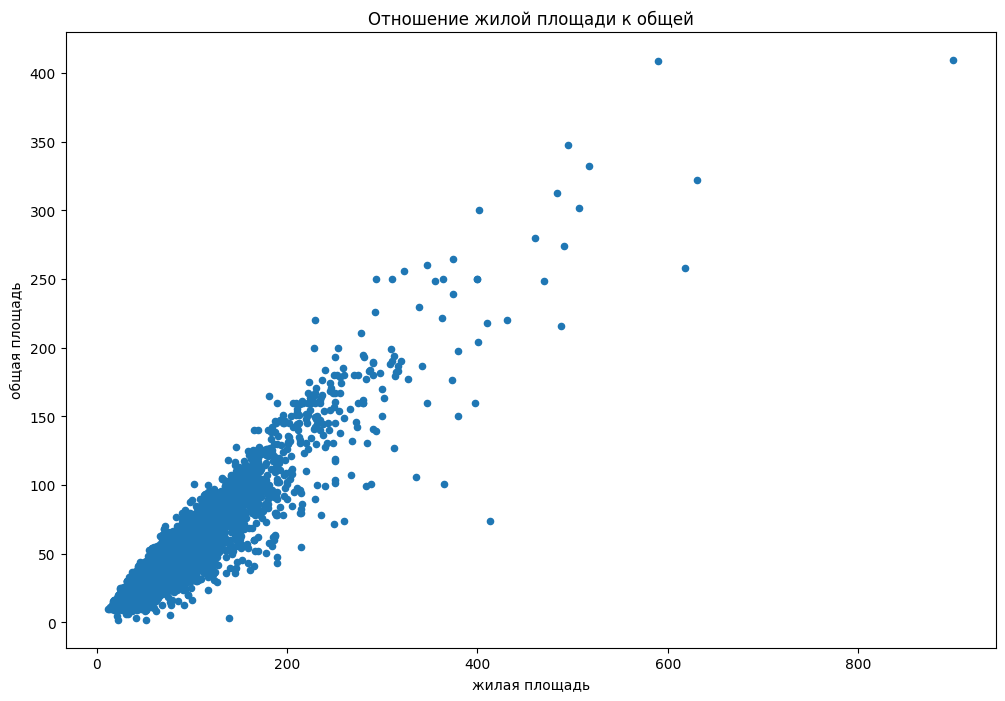

In [22]:
df.plot(x='total_area_sqm', y='living_area_sqm', kind='scatter', figsize=(12, 8))
plt.title("Отношение жилой площади к общей")
plt.xlabel("жилая площадь")
plt.ylabel("общая площадь")
plt.show()

In [23]:
living_area_ratio = (df['living_area_sqm'] / df['total_area_sqm']).mean()
df['living_area_sqm'] = df['living_area_sqm'].fillna(df['total_area_sqm'] * living_area_ratio)

В некоторых объявлениях сумма площади кухни и жилой площади превышает жилую площадь.
Возможно, это коммунальные квартиры и указана общая площадь кухни, а не доля собственника.
Количество таких объявлений мало, удаляем.

In [24]:
"Количество объектов, в которых сумма площади кухни и жилой площади превышает жилую площадь: {}".format(df[df['total_area_sqm'] < (df['living_area_sqm'] + df['kitchen_area_sqm'])]['last_price'].count())

'Количество объектов, в которых сумма площади кухни и жилой площади превышает жилую площадь: 72'

In [25]:
df = df[df['total_area_sqm'] >= (df['living_area_sqm'] + df['kitchen_area_sqm'])]

### Вывод

Удалось избавиться от пропусков в некоторых колонках.

Остались пропуски в колонках мы не можем корректно заполнить. Необходимость заполнять поля искуственными данными в данный момент не видим, поэтому оставляем пропуски. Возможный алгоритм заполнения пропусков зависит от целей исследования.

Колонка `ceiling_height_m` скорее всего заполняется пользователем при создании объявления. Возможно, ее заполнение на сайте не обязательно.

Поля `dist_to_airport_m`, `dist_to_center_m`, `dist_to_park_m`, `dist_to_pond_m` скорее всего заполняются автоматически по координатам объекта. Видимо, причина отсутствия значений в алгоритме сайта. Возможно, нет точных координат объекта или расстояние слишком велико.

Возможно, объявления в пропущенным `days_exposed` это черновики.

In [26]:
df.isna().sum().sort_values(ascending=False)

,0
dist_to_park_m,13928
dist_to_pond_m,13068
ceiling_height_m,7771
dist_to_airport_m,4793
dist_to_center_m,4772
days_exposed,2962
kitchen_area_sqm,0
num_ponds_3km,0
num_parks_3km,0
locality_name,0


## Изменение типов данных

Заменяем типы с вещественного на целочисленный там, где объектов может быть только целое число.
`num_floors` заменить тип с float на int. Для пропущенных значений ставим `0`.  
`num_balconies` заменить тип с float на int.  
`num_parks_3km` заменить тип с float на int.  
`num_ponds_3km` заменить тип с float на int.  
`days_exposed` заменить тип с float на int.
`is_apartment` заменить тип с object на bool.  


In [27]:
df = df.copy()
df.loc[:, 'num_floors'] = df['num_floors'].fillna(False)
df.loc[:, 'num_floors'] = df['num_floors'].astype('int', errors='raise')
df.loc[:, 'num_balconies'] = df['num_balconies'].astype('int', errors='raise')
df.loc[:, 'num_parks_3km'] = df['num_parks_3km'].astype('int', errors='raise')
df.loc[:, 'num_ponds_3km'] = df['num_ponds_3km'].astype('int', errors='raise')
df.loc[:, 'days_exposed'] = df['days_exposed'].astype('int', errors='ignore')
df.loc[:, 'is_apartment'] = df['is_apartment'].astype('bool', errors='raise')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21271 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_images         21271 non-null  int64  
 1   last_price         21271 non-null  float64
 2   total_area_sqm     21271 non-null  float64
 3   pub_datetime       21271 non-null  object 
 4   num_rooms          21271 non-null  int64  
 5   ceiling_height_m   13500 non-null  float64
 6   num_floors         21271 non-null  float64
 7   living_area_sqm    21271 non-null  float64
 8   floor_num          21271 non-null  int64  
 9   is_apartment       21271 non-null  bool   
 10  is_studio          21271 non-null  bool   
 11  is_open_plan       21271 non-null  bool   
 12  kitchen_area_sqm   21271 non-null  float64
 13  num_balconies      21271 non-null  float64
 14  locality_name      21271 non-null  object 
 15  dist_to_airport_m  16478 non-null  float64
 16  dist_to_center_m   16499 no

## Поиск неявных дубликатов

### Поиск по параметрам квартиры

Есть две квартиры с идентичными параметрами и ценой. Скорее всего, это дубликат. Удаляем.

In [28]:
df[df.drop(columns=['pub_datetime', 'days_exposed']).duplicated(keep=False)]

,num_images,last_price,total_area_sqm,pub_datetime,num_rooms,ceiling_height_m,num_floors,living_area_sqm,floor_num,is_apartment,...,kitchen_area_sqm,num_balconies,locality_name,dist_to_airport_m,dist_to_center_m,num_parks_3km,dist_to_park_m,num_ponds_3km,dist_to_pond_m,days_exposed


In [29]:
df = df.drop_duplicates(subset=[col for col in df.columns if col not in ['pub_datetime', 'days_exposed']])

### Поиск дубликатов в названии населенного пункта

In [30]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

Дубликаты возникают при нерегламентированном использовании букв `е` и `ё`. Заменяем `ё` на `е`.

In [31]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

Ищем похожие названия с помощью библиотеки нечеткого сравнения `fuzzywuzzy`. При сравнении игнорируем части названия `деревня `, `поселок городского типа `, `поселок `, `городской поселок `.

In [32]:
def clean_locality_name(name):
    for word in [
        'деревня ',
        'поселок городского типа ',
        'поселок ',
        'городской поселок ',
    ]:
        name = name.replace(word, '')
    return name

def find_similar_strings(data, threshold=90):
    similar_strings = []
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            if data[i] and data[j]:
                if isinstance(data[i], str) and isinstance(data[j], str):
                    similarity = fuzz.ratio(clean_locality_name(data[i]), clean_locality_name(data[j]))
                    if similarity >= threshold:
                        similar_strings.append((data[i], data[j], similarity))
    return similar_strings

for pair in find_similar_strings(list(df['locality_name'].unique())):
    if pair[2] < 90:
        continue
    print(pair[0], '/', pair[1])

поселок Мурино / Мурино
деревня Кудрово / Кудрово
поселок Торковичи / деревня Торошковичи
Коммунар / поселок Коммунары
поселок Зимитицы / деревня Зимитицы
поселок Рябово / поселок городского типа Рябово
деревня Калитино / поселок Калитино
поселок Щеглово / деревня Щеглово
деревня Рабитицы / поселок Рабитицы
деревня Гарболово / поселок Гарболово
Любань / поселок Любань
деревня Курковицы / деревня Куровицы


Второй способ поиска дубликатов - сравниваем только слова, начинающиеся с заглавной буквы.
При необходимости можно провести более тщательные проверки.

In [33]:


def clean_string(input_string):
    # ElasticSearch на минималках. Фуцнкция выделяет только зерно названия населенного пункта
    # Удаление слов, начинающихся со строчной буквы
    cleaned_string = re.sub(r'\b[a-zа-яё]\w*\b', '', input_string, flags=re.UNICODE)
    # Удаление всех символов, кроме букв и цифр
    cleaned_string = re.sub(r'[^a-zA-Zа-яА-ЯёЁ0-9]', '', cleaned_string)
    # Приведение строки к нижнему регистру
    cleaned_string = cleaned_string.lower()
    return cleaned_string

cleaned_dict = {}
for original in df['locality_name'].unique():
    cleaned = clean_string(original)
    if cleaned in cleaned_dict:
        cleaned_dict[cleaned].append(original)
    else:
        cleaned_dict[cleaned] = [original]

for cleaned, originals in cleaned_dict.items():
    if len(originals) > 1:
        print(f"{cleaned}: {originals}")


мурино: ['поселок Мурино', 'Мурино']
кудрово: ['деревня Кудрово', 'Кудрово']
федоровское: ['деревня Федоровское', 'городской поселок Федоровское']
никольское: ['Никольское', 'село Никольское']
рощино: ['поселок городского типа Рощино', 'городской поселок Рощино']
павлово: ['село Павлово', 'городской поселок Павлово', 'поселок городского типа Павлово']
советский: ['поселок городского типа Советский', 'городской поселок Советский']
большаяижора: ['городской поселок Большая Ижора', 'поселок городского типа Большая Ижора']
лесогорский: ['городской поселок Лесогорский', 'поселок городского типа Лесогорский']
рахья: ['поселок городского типа Рахья', 'садовое товарищество Рахья']
зимитицы: ['поселок Зимитицы', 'деревня Зимитицы']
рябово: ['поселок Рябово', 'поселок городского типа Рябово']
мга: ['городской поселок Мга', 'поселок городского типа Мга']
вещево: ['поселок станции Вещево', 'поселок при железнодорожной станции Вещево']
калитино: ['деревня Калитино', 'поселок Калитино']
приладожский

Проверяем населенные пункты по [ОКАТО](https://classifikators.ru/okato/) и по [индексу](https://www.pochta.ru/RU/post-index). Объединяем записи, если имеется ввиду один и тот же населенный пункт.
* поселок Мурино / Мурино - [Мурино](https://classifikators.ru/okato/41212504000)
* деревня Кудрово / Кудрово - [Кудрово](https://classifikators.ru/okato/41212503000)
* Коммунар / поселок Коммунары - разные
* поселок Торковичи / деревня Торошковичи - разные
* [поселок Зимитицы](https://classifikators.ru/okato/41206000079)) / [деревня Зимитицы](https://classifikators.ru/okato/41206000078)) - разные
* [поселок Рябово](https://www.pochta.ru/offices/188840) / [поселок городского типа Рябово](https://www.pochta.ru/offices/187040) - разные
* [деревня Калитино](https://classifikators.ru/okato/41206000101) / [поселок Калитино](https://classifikators.ru/okato/41206000102) - разные
* [поселок Щеглово](https://classifikators.ru/okato/41212000141) / [деревня Щеглово](https://classifikators.ru/okato/41212000140) - разные
* [деревня Рабитицы](https://classifikators.ru/okato/41206000155) / [поселок Рабитицы](https://classifikators.ru/okato/41206000156) - разные
* деревня Гарболово / поселок Гарболово - [деревня Гарболово](https://classifikators.ru/okato/41212000068)
* деревня Пчева / поселок Пчевжа - разные
* [Любань](https://classifikators.ru/okato/41248505000) / [поселок Любань](https://classifikators.ru/okato/41248000035) - разные
* деревня Курковицы / деревня Куровицы - разные
* поселок станции Приветнинское / поселок при железнодорожной станции Приветнинское - поселок станции Приветнинское


In [34]:
df['locality_name'] = df['locality_name'].replace('поселок Мурино', 'Мурино')
df['locality_name'] = df['locality_name'].replace('деревня Кудрово', 'Кудрово')
df['locality_name'] = df['locality_name'].replace('поселок Гарболово', 'деревня Гарболово')
df['locality_name'] = df['locality_name'].replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
df['locality_name'] = df['locality_name'].replace('поселок Мурино', 'Мурино')

## Поиск аномалий

### ceiling_height_m

In [35]:
df['ceiling_height_m'].describe()

,ceiling_height_m
count,13500.00
mean,2.76
std,1.20
min,1.00
25%,2.51
50%,2.65
75%,2.80
max,100.00


В колонке высоты потолка встречаются значения от 1 до 100. Предположим, что потолок может быть от 2.20 м в "хрущевке" до 6 м в отдельном доме. Вероятно, значения от 22 до 60 ввели неверно, без запятой. Поделим эти значения на 10.

In [36]:
df.loc[(df['ceiling_height_m'] >= 22) & (df['ceiling_height_m'] <= 60), 'ceiling_height_m'] /= 10
df.query('ceiling_height_m < 2.2 or ceiling_height_m > 6')['last_price'].count()

18

Осталось всего 22 записи с нереалистичной высотой потолка, удаляем.

In [37]:
df = df.drop(df.query('ceiling_height_m < 2.2 or ceiling_height_m > 6').index)

### num_rooms

In [38]:
df['num_rooms'].describe()

,num_rooms
count,21253.00
mean,2.10
std,1.06
min,1.00
25%,1.00
50%,2.00
75%,3.00
max,19.00


В данных встречаются квартиры к нулевым количеством комнат. Очевидно, при вводе данных не заполнили это поле.

In [39]:
df.query('num_rooms == 0')['last_price'].count()

0

Квартир с неуказанным количеством комнат 197, меньше одного процента, можно удалить.

In [40]:
df = df[df['num_rooms'] != 0]

### dist_to_airport_m

Есть одна квартира с нулевым расстоянием до аэропорта. Это явно ошибка, запись можно удалить.

In [41]:
df.query('dist_to_airport_m == 0')['last_price'].count()

1

In [42]:
df = df.drop(df.query('dist_to_airport_m == 0').index)

### last_price

In [43]:
df['last_price'].describe()

,last_price
count,21252.00
mean,6543855.77
std,9751849.37
min,12190.00
25%,3500000.00
50%,4700000.00
75%,6800000.00
max,420000000.00


In [44]:
df.query('last_price < 400000')

,num_images,last_price,total_area_sqm,pub_datetime,num_rooms,ceiling_height_m,num_floors,living_area_sqm,floor_num,is_apartment,...,kitchen_area_sqm,num_balconies,locality_name,dist_to_airport_m,dist_to_center_m,num_parks_3km,dist_to_park_m,num_ponds_3km,dist_to_pond_m,days_exposed
8793,7,12190.00,109.00,2019-03-20T00:00:00,2,2.75,25.00,32.00,25,False,...,40.50,0.00,Санкт-Петербург,36421.00,9176.00,1,805.00,0,NaN,8.00


Есть одна квартира с неадекватно низкой ценой. Удаляем.

In [45]:
df = df[df['last_price'] > 400000]

## Добавление колонок

Добавляем вычисляемые колонки. Описание колонок выше.

In [46]:
df['pub_datetime'] = pd.to_datetime(df['pub_datetime'], format='%Y-%m-%dT%H:%M:%S')
df['pub_dow'] = pd.DatetimeIndex(df['pub_datetime']).weekday + 1
df['pub_dow'] = df['pub_datetime'].dt.weekday + 1
df['pub_month'] = df['pub_datetime'].dt.month
df['pub_year'] = df['pub_datetime'].dt.year

df['price_per_sqm'] = df['last_price'] / df['total_area_sqm']

df['dist_to_center_km'] = (df['dist_to_center_m'] / 1000).round().astype(int, errors='ignore')
df['dist_to_airport_km'] = (df['dist_to_airport_m'] / 1000).round().astype(int, errors='ignore')

def floor_type(data):
  if data['floor_num'] == 1:
    return 'первый'
  if data['floor_num'] == data['num_floors']:
    return 'последний'
  return 'другой'
df['floor_type'] = df.apply(floor_type, axis=1)

df['price_mln'] = df['last_price'] / 1e6
df['price_mln'] = df['price_mln'].round(1)

df.head()

,num_images,last_price,total_area_sqm,pub_datetime,num_rooms,ceiling_height_m,num_floors,living_area_sqm,floor_num,is_apartment,...,dist_to_pond_m,days_exposed,pub_dow,pub_month,pub_year,price_per_sqm,dist_to_center_km,dist_to_airport_km,floor_type,price_mln
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,755.00,NaN,4,3,2019,120370.37,16.00,19.00,другой,13.00
1,7,3350000.00,40.40,2018-12-04,1,NaN,11.00,18.60,1,False,...,NaN,81.00,2,12,2018,82920.79,19.00,13.00,первый,3.40
2,10,5196000.00,56.00,2015-08-20,2,NaN,5.00,34.30,4,False,...,574.00,558.00,4,8,2015,92785.71,14.00,22.00,другой,5.20
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,48.00,121.00,2,6,2018,100000.00,8.00,32.00,другой,10.00
5,10,2890000.00,30.40,2018-09-10,1,NaN,12.00,14.40,5,False,...,NaN,55.00,1,9,2018,95065.79,NaN,NaN,другой,2.90


## Выводы

В рамках предобработки были:
- скорректированы названия и типы колонок, добавлены вычисляемые колонки для удобства дельнейшего анализа;
- удалены записи с явными пропусками, которые могли бы помешать анализу данных;
- в названиях населенных пунктов были исправлены неявные дубликаты, записи без информации о населенном пункте удалены;
- обнаружены аномальные значения в нескольких колонках, некоторые значения были исправлены, в остальных случаях записи удалены.

В итоге из начальных 23699 записей осталось 21251. Предварительная обработка повлияла на объем данных в пределах 10%.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21251 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   num_images          21251 non-null  int64         
 1   last_price          21251 non-null  float64       
 2   total_area_sqm      21251 non-null  float64       
 3   pub_datetime        21251 non-null  datetime64[ns]
 4   num_rooms           21251 non-null  int64         
 5   ceiling_height_m    13480 non-null  float64       
 6   num_floors          21251 non-null  float64       
 7   living_area_sqm     21251 non-null  float64       
 8   floor_num           21251 non-null  int64         
 9   is_apartment        21251 non-null  bool          
 10  is_studio           21251 non-null  bool          
 11  is_open_plan        21251 non-null  bool          
 12  kitchen_area_sqm    21251 non-null  float64       
 13  num_balconies       21251 non-null  float64       


In [48]:
df.sample(10)

,num_images,last_price,total_area_sqm,pub_datetime,num_rooms,ceiling_height_m,num_floors,living_area_sqm,floor_num,is_apartment,...,dist_to_pond_m,days_exposed,pub_dow,pub_month,pub_year,price_per_sqm,dist_to_center_km,dist_to_airport_km,floor_type,price_mln
9528,3,4000000.00,41.00,2017-02-16,2,NaN,5.00,27.33,5,False,...,312.00,27.00,4,2,2017,97560.98,8.00,39.00,последний,4.00
13993,6,3300000.00,43.00,2019-05-03,1,2.60,17.00,18.00,3,False,...,287.00,NaN,5,5,2019,76744.19,34.00,29.00,другой,3.30
9844,3,2400000.00,48.00,2015-05-20,2,NaN,5.00,27.00,5,False,...,NaN,600.00,3,5,2015,50000.00,NaN,NaN,последний,2.40
1409,15,6700000.00,72.00,2017-08-23,3,2.70,12.00,47.00,4,False,...,593.00,60.00,3,8,2017,93055.56,12.00,28.00,другой,6.70
3255,20,13500000.00,75.70,2017-10-12,2,NaN,16.00,34.20,13,False,...,372.00,120.00,4,10,2017,178335.54,8.00,30.00,другой,13.50
12208,7,9000000.00,60.30,2019-05-03,2,3.25,5.00,36.90,4,False,...,NaN,NaN,5,5,2019,149253.73,5.00,32.00,другой,9.00
20403,11,4200000.00,75.00,2018-03-22,4,2.50,9.00,49.50,2,False,...,NaN,230.00,4,3,2018,56000.00,NaN,NaN,другой,4.20
12948,2,14000000.00,90.00,2015-11-22,3,NaN,5.00,58.70,5,False,...,77.00,378.00,7,11,2015,155555.56,2.00,24.00,последний,14.00
1485,4,3550000.00,30.00,2017-11-03,1,2.70,9.00,16.00,3,False,...,NaN,328.00,5,11,2017,118333.33,14.00,18.00,другой,3.60
7735,14,3450000.00,34.40,2019-02-12,1,2.60,5.00,15.90,4,False,...,NaN,NaN,2,2,2019,100290.70,30.00,17.00,другой,3.40


# Анализ данных

## Общая площадь

Распределение значений общей площади примерно соответствует форме распределения Пуассона, но есть дополнительные пики. При построении отдельных гистаграмм для одно-, двух-, трех-комнатных и достальных квартир видно, что пики связаны с количеством комнат.

Наиболее часто встречаются квартиры площадью 40-70 кв.м.

In [49]:
df['total_area_sqm'].describe()

,total_area_sqm
count,21251.00
mean,60.75
std,35.06
min,14.00
25%,40.60
50%,52.40
75%,70.00
max,900.00


<Axes: xlabel='Общая площадь (кв.м.)', ylabel='Частота'>

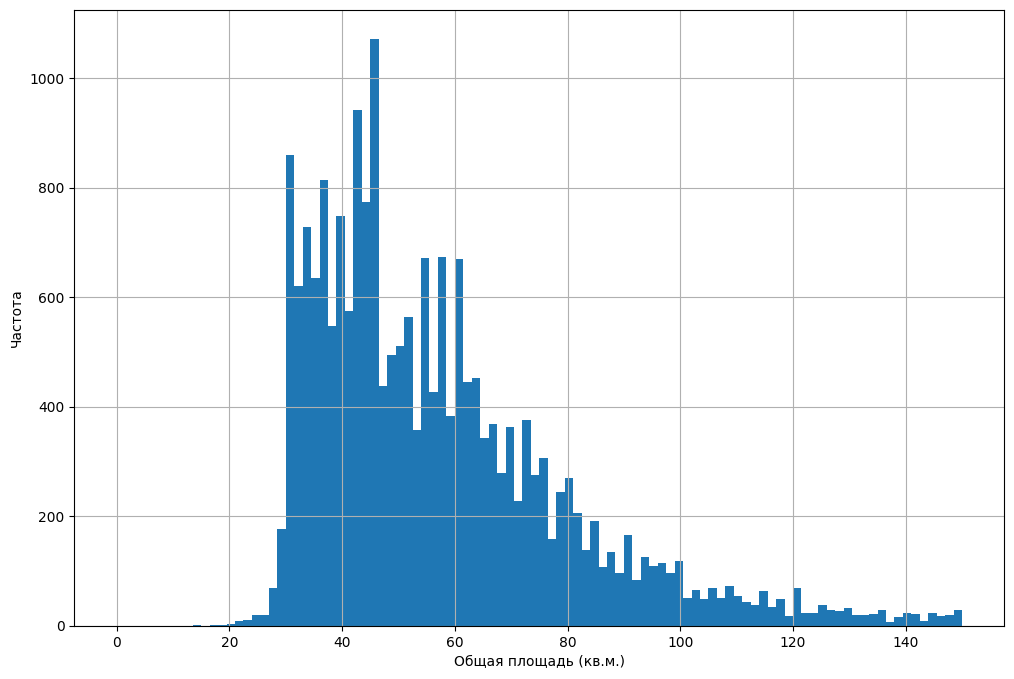

In [50]:
plt.figure(figsize=(12, 8))
plt.xlabel('Общая площадь (кв.м.)')
plt.ylabel('Частота')
df['total_area_sqm'].hist(bins=100, range=(0, 150))

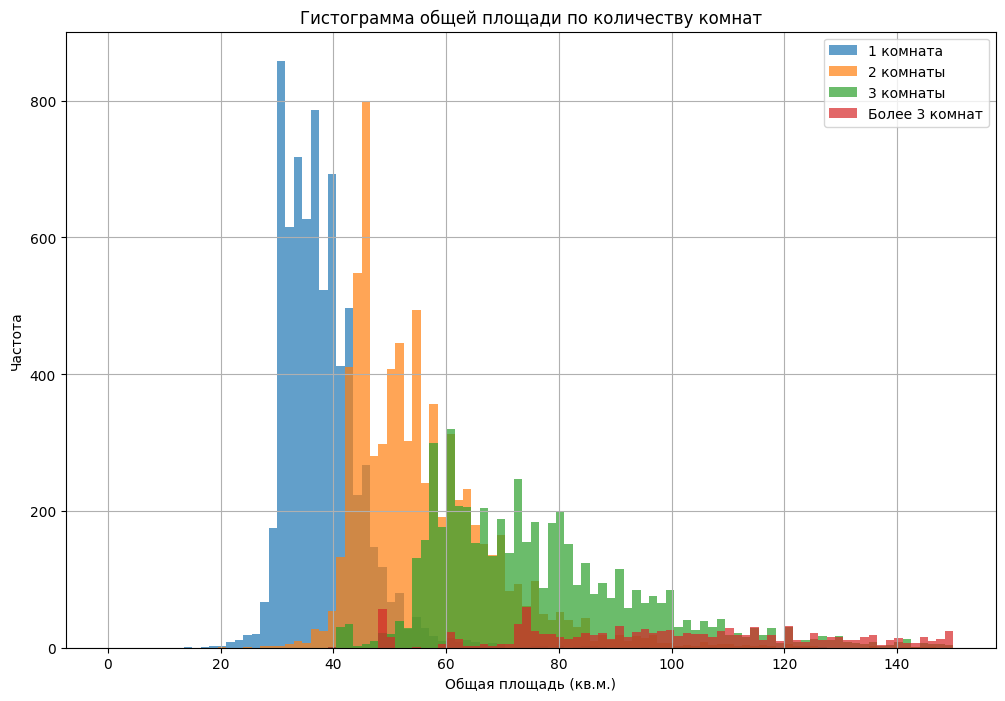

In [51]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма общей площади по количеству комнат')
plt.xlabel('Общая площадь (кв.м.)')
plt.ylabel('Частота')
df[df['num_rooms'] == 1]['total_area_sqm'].hist(bins=100, range=(0, 150), label='1 комната', alpha=0.7)
df[df['num_rooms'] == 2]['total_area_sqm'].hist(bins=100, range=(0, 150), label='2 комнаты', alpha=0.7)
df[df['num_rooms'] == 3]['total_area_sqm'].hist(bins=100, range=(0, 150), label='3 комнаты', alpha=0.7)
df[df['num_rooms'] > 3]['total_area_sqm'].hist(bins=100, range=(0, 150), label='Более 3 комнат', alpha=0.7)
plt.legend()

## Жилая площадь

На гистограме жилой площади видно три пика в районах 18, 30 и 45 кв.м. Очевидно, они соответствуют одно-, двух- и трех-комнатным квартирам.

Корреляция между жилой площадью и количеством комнат высокая.

In [52]:
df['living_area_sqm'].describe()

,living_area_sqm
count,21251.00
mean,34.73
std,22.17
min,2.00
25%,19.00
50%,30.10
75%,42.50
max,409.70


<Axes: xlabel='Жилая площадь (кв.м.)', ylabel='Частота'>

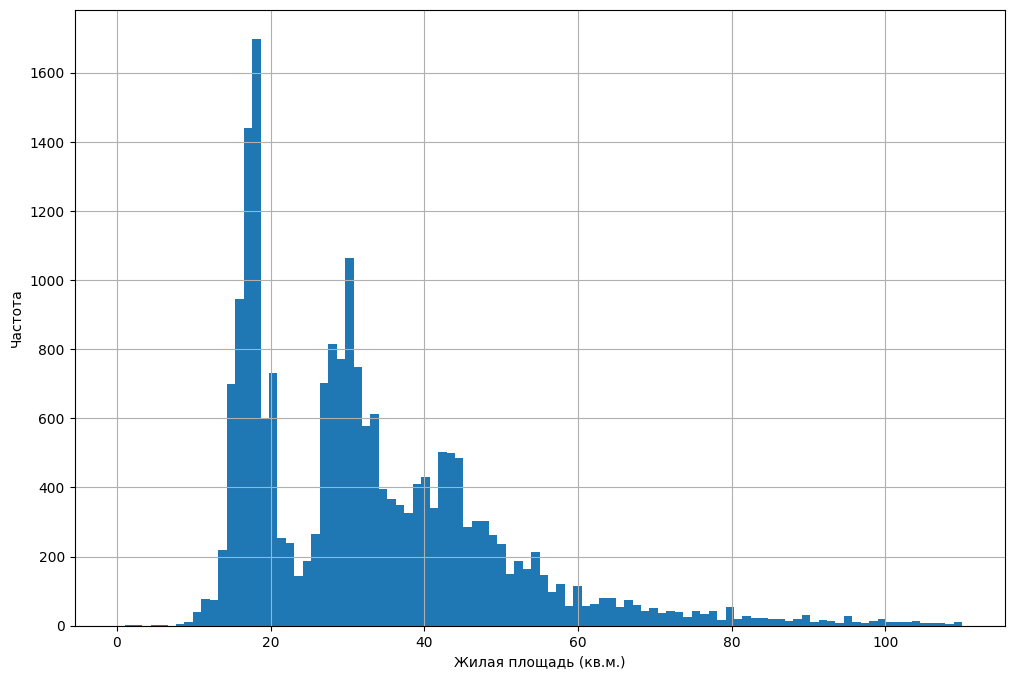

In [53]:
plt.figure(figsize=(12, 8))
plt.xlabel('Жилая площадь (кв.м.)')
plt.ylabel('Частота')
df['living_area_sqm'].hist(bins=100, range=(0, 110))

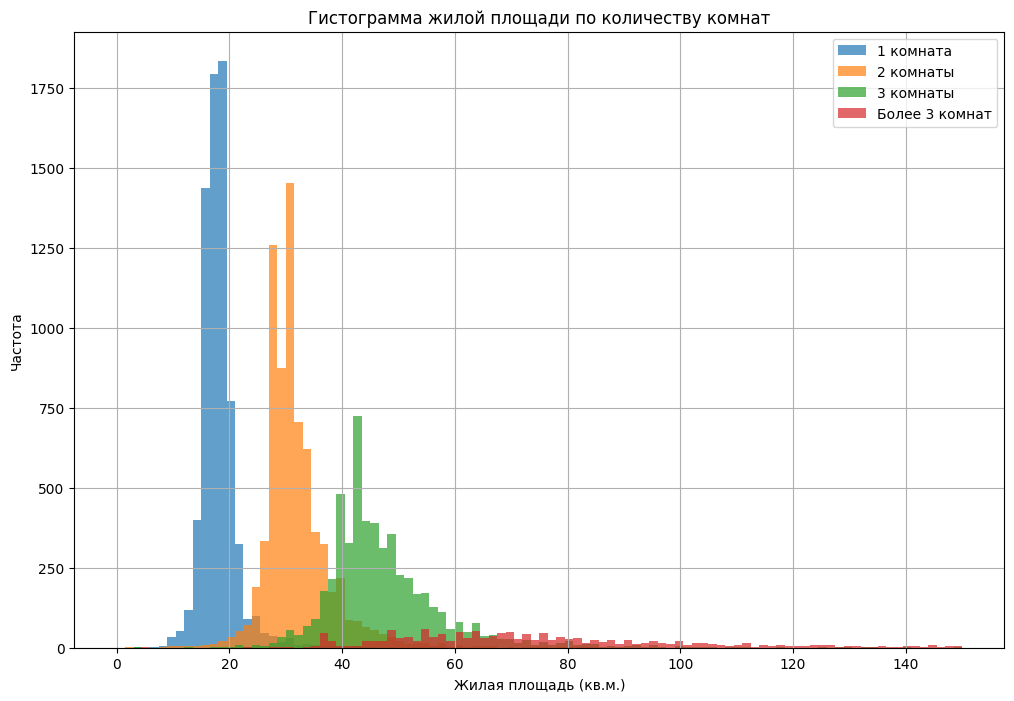

In [54]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма жилой площади по количеству комнат')
plt.xlabel('Жилая площадь (кв.м.)')
plt.ylabel('Частота')
df[df['num_rooms'] == 1]['living_area_sqm'].hist(bins=100, range=(0, 150), label='1 комната', alpha=0.7)
df[df['num_rooms'] == 2]['living_area_sqm'].hist(bins=100, range=(0, 150), label='2 комнаты', alpha=0.7)
df[df['num_rooms'] == 3]['living_area_sqm'].hist(bins=100, range=(0, 150), label='3 комнаты', alpha=0.7)
df[df['num_rooms'] > 3]['living_area_sqm'].hist(bins=100, range=(0, 150), label='Более 3 комнат', alpha=0.7)
plt.legend()

In [55]:
'Корреляция между жилой площадью и количеством комнат: {:.2%}'.format(df['living_area_sqm'].corr(df['num_rooms']))

'Корреляция между жилой площадью и количеством комнат: 84.45%'

## Площадь кухни

Распределение значений общей площади кухни примерно соответствует форме распределения Пуассона.

Площадь кухни не зависит от количества комнат и слабо зависит от общей площади.

In [56]:
df['kitchen_area_sqm'].describe()

,kitchen_area_sqm
count,21251.00
mean,10.54
std,5.87
min,1.30
25%,7.00
50%,9.10
75%,12.00
max,112.00


<Axes: >

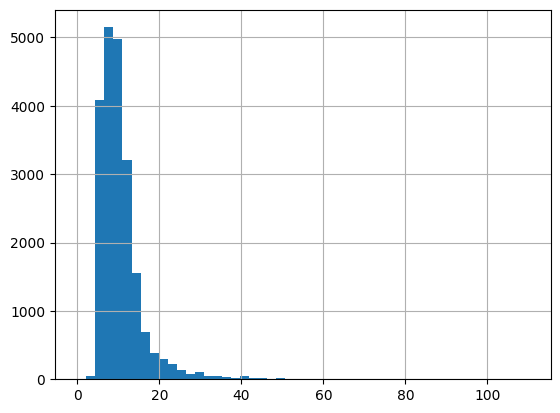

In [57]:
df['kitchen_area_sqm'].hist(bins=50, range=(0, 110))

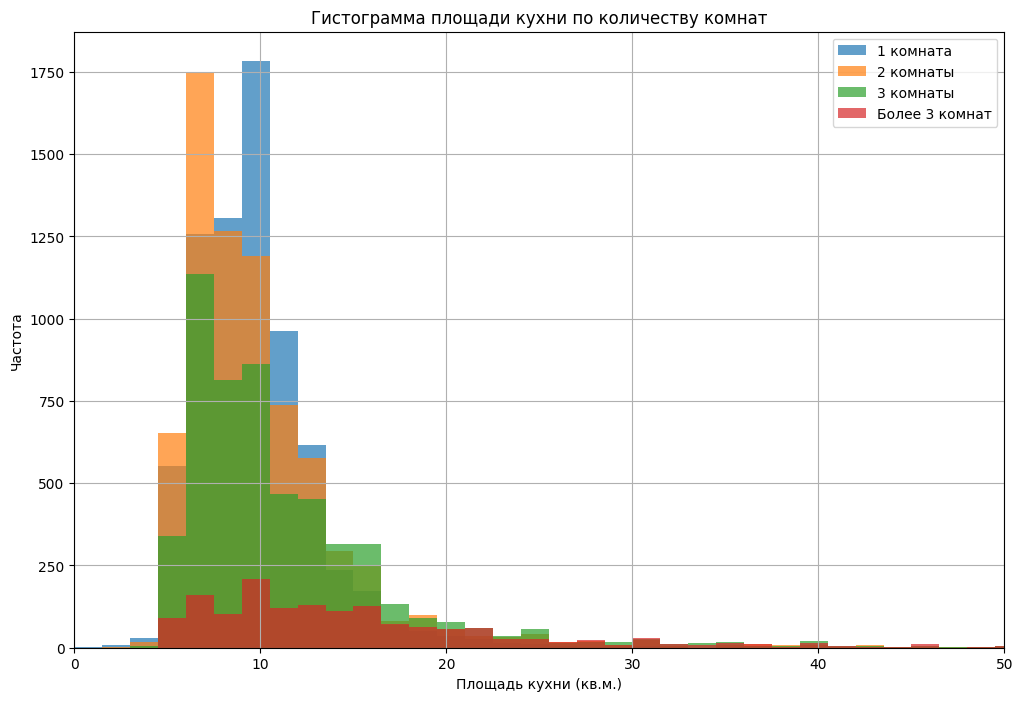

In [58]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма площади кухни по количеству комнат')
plt.xlabel('Площадь кухни (кв.м.)')
plt.ylabel('Частота')
plt.xlim(0, 50)
df[df['num_rooms'] == 1]['kitchen_area_sqm'].hist(bins=100, range=(0, 150), label='1 комната', alpha=0.7)
df[df['num_rooms'] == 2]['kitchen_area_sqm'].hist(bins=100, range=(0, 150), label='2 комнаты', alpha=0.7)
df[df['num_rooms'] == 3]['kitchen_area_sqm'].hist(bins=100, range=(0, 150), label='3 комнаты', alpha=0.7)
df[df['num_rooms'] > 3]['kitchen_area_sqm'].hist(bins=100, range=(0, 150), label='Более 3 комнат', alpha=0.7)
plt.legend()

In [59]:
'Корреляция между площадью кухни и количеством комнат: {:.2%}'.format(df['kitchen_area_sqm'].corr(df['num_rooms']))

'Корреляция между площадью кухни и количеством комнат: 27.26%'

In [60]:
'Корреляция между площадью кухни и общей площадью: {:.2%}'.format(df['kitchen_area_sqm'].corr(df['living_area_sqm']))

'Корреляция между площадью кухни и общей площадью: 43.77%'

## Цена

Большинство предложений находится в диапазоне 3,4 - 6,8 млн.руб.


In [61]:
df['price_mln'].describe()

,price_mln
count,21251.00
mean,6.55
std,9.75
min,0.40
25%,3.50
50%,4.70
75%,6.80
max,420.00


In [62]:
print("Медианная цена 1-комнатной квартиры: {} млн.руб.".format(df[df['num_rooms'] == 1]['price_mln'].median()))
print("Медианная цена 2-комнатной квартиры: {} млн.руб.".format(df[df['num_rooms'] == 2]['price_mln'].median()))
print("Медианная цена 3-комнатной квартиры: {} млн.руб.".format(df[df['num_rooms'] == 3]['price_mln'].median()))


Медианная цена 1-комнатной квартиры: 3.6 млн.руб.
Медианная цена 2-комнатной квартиры: 4.8 млн.руб.
Медианная цена 3-комнатной квартиры: 6.2 млн.руб.


<Axes: title={'center': 'Гистограмма цены'}, xlabel='Цена (млн.руб.)', ylabel='Частота'>

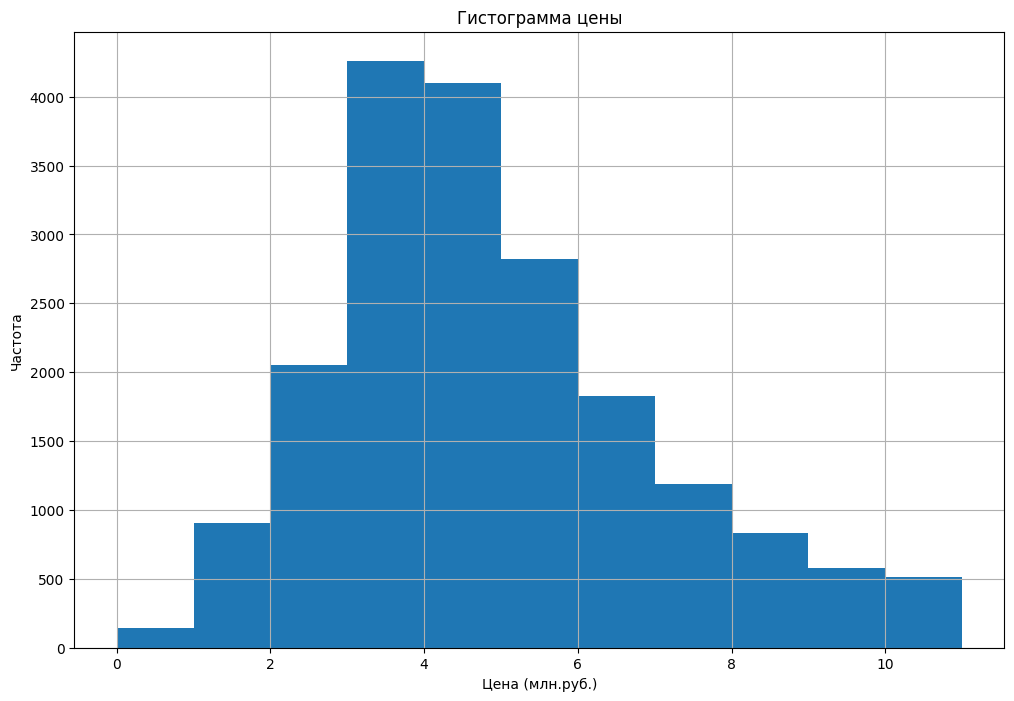

In [63]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма цены')
plt.xlabel('Цена (млн.руб.)')
plt.ylabel('Частота')
df['price_mln'].hist(bins=11, range=(0, 11))

## Количество комнат

Больше всего продается одно- и двух-комнатных квартир. Квартир больше трех комнат мало.

<Axes: title={'center': 'Гистограмма количества комнат'}, xlabel='Количество комнат', ylabel='Частота'>

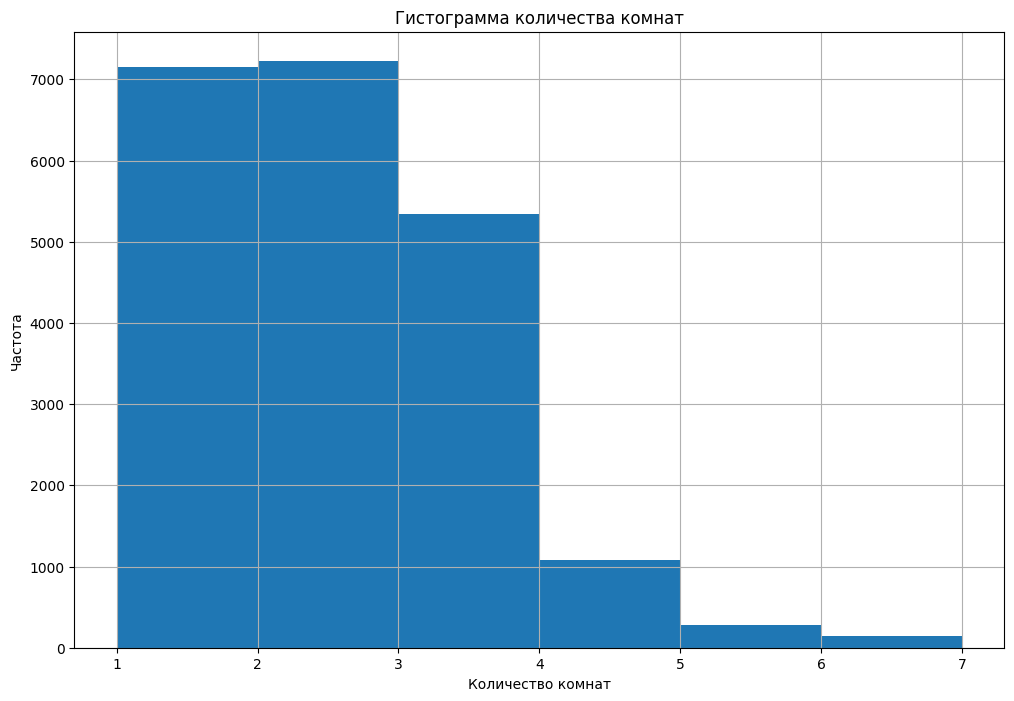

In [64]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
df['num_rooms'].hist(bins=6, range=(1, 7))

## Высота потолков

Чаще всего встречаются потолки от 2,5 до 2,8 метров.

In [65]:
df['ceiling_height_m'].describe()

,ceiling_height_m
count,13480.00
mean,2.73
std,0.27
min,2.20
25%,2.51
50%,2.65
75%,2.80
max,6.00


<Axes: title={'center': 'Гистограмма высоты потолка'}, xlabel='Высота потолка (м.)', ylabel='Частота'>

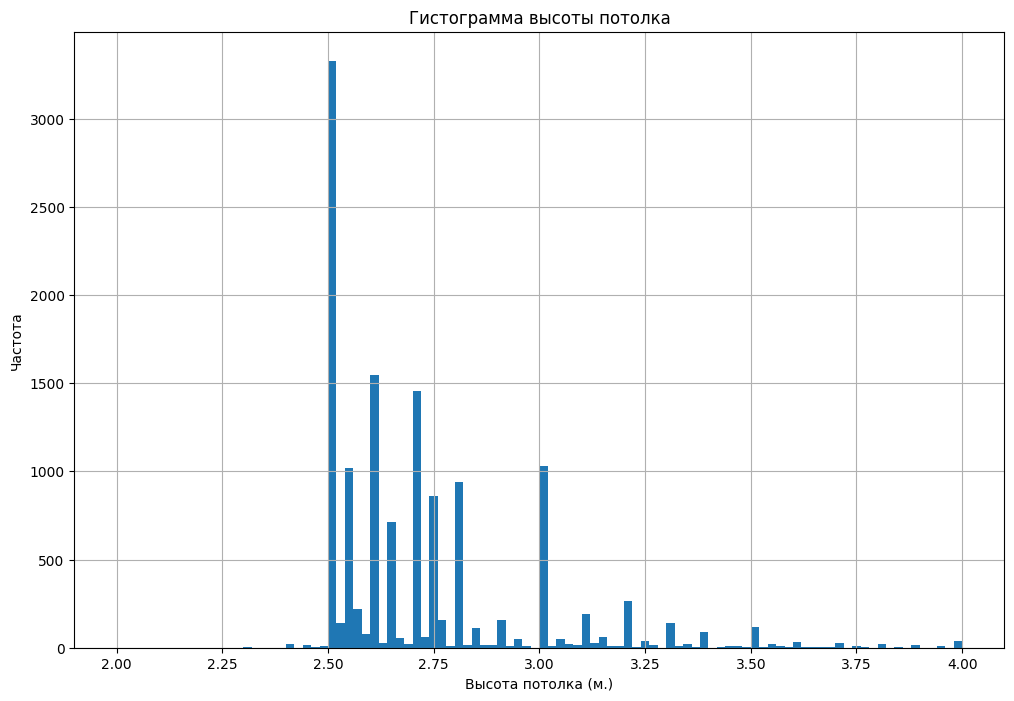

In [66]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма высоты потолка')
plt.xlabel('Высота потолка (м.)')
plt.ylabel('Частота')
df['ceiling_height_m'].hist(bins=100, range=(2, 4))

## Этаж

Форма гистограммы естественная. Чаще всего встречаются квартиры на этажах от 2 до 8.

In [67]:
df['floor_num'].describe()

,floor_num
count,21251.00
mean,5.84
std,4.82
min,1.00
25%,2.00
50%,4.00
75%,8.00
max,33.00


<Axes: title={'center': 'Гистограмма этажа'}, xlabel='Этаж', ylabel='Частота'>

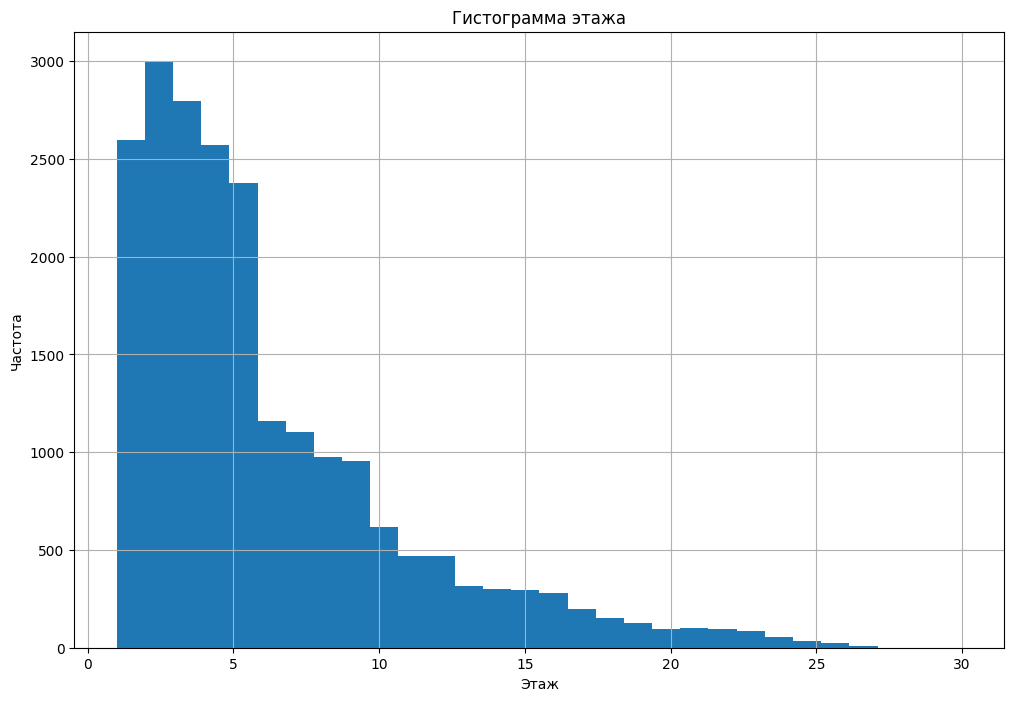

In [68]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма этажа')
plt.xlabel('Этаж')
plt.ylabel('Частота')
df['floor_num'].hist(bins=30, range=(1, 30))

## Общее количество этажей

In [69]:
df['num_floors'].describe()

,num_floors
count,21251.00
mean,10.58
std,6.52
min,1.00
25%,5.00
50%,9.00
75%,15.00
max,60.00


## Тип этажа

Распределение по этажам выглядит равномерно. Медианная высота здания - 9 этажей. Не первых и не последних этажей 7. 17500/2500=7.

<Axes: title={'center': 'Гистограмма типа этажа'}, ylabel='Частота'>

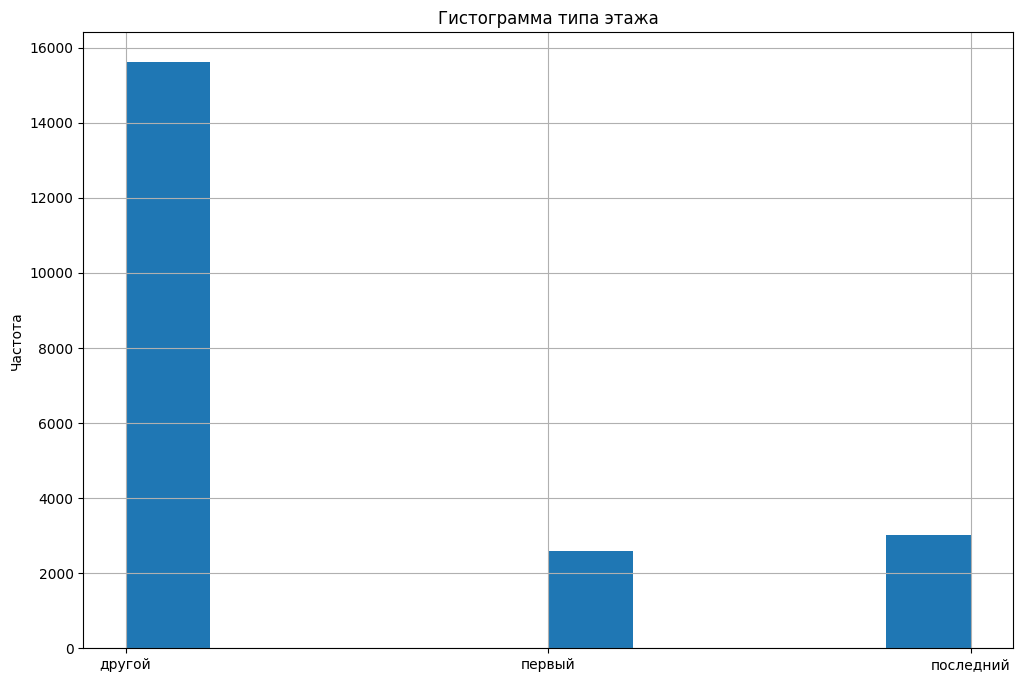

In [70]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма типа этажа')
plt.ylabel('Частота')
df['floor_type'].hist()

## Расстояние до центра города

Медианное расстояние до центра 9 км. Гистограмма имеет нестандартную форму, видно два пика в райне 5 и 15 км. Возможно, это связано с методикой расчета расстояний.

In [71]:
df['dist_to_center_km'].describe()

,dist_to_center_km
count,16487.00
mean,14.22
std,8.66
min,0.00
25%,9.00
50%,13.00
75%,16.00
max,66.00


<Axes: title={'center': 'Гистограмма расстояния до центра'}, xlabel='Расстояние до центра (км.)', ylabel='Частота'>

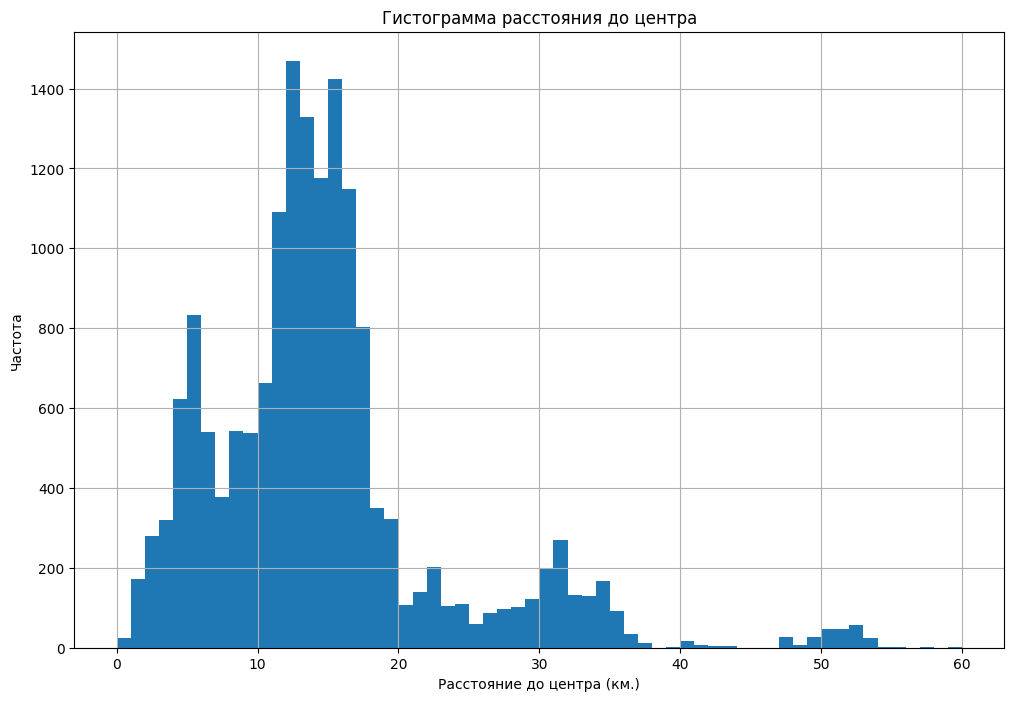

In [72]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма расстояния до центра')
plt.xlabel('Расстояние до центра (км.)')
plt.ylabel('Частота')
df['dist_to_center_km'].hist(bins=60, range=(0, 60))

## Расстояние до аэропорта

Медианное расстояние до аэропорта 27 км. Распределение достаточно равномерное, похоже на распределение Пуассона.

In [73]:
df['dist_to_airport_km'].describe()

,dist_to_airport_km
count,16466.00
mean,28.83
std,12.64
min,6.00
25%,19.00
50%,27.00
75%,37.00
max,85.00


<Axes: title={'center': 'Гистограмма расстояния до аэропорта'}, xlabel='Расстояние до центра (км.)', ylabel='Частота'>

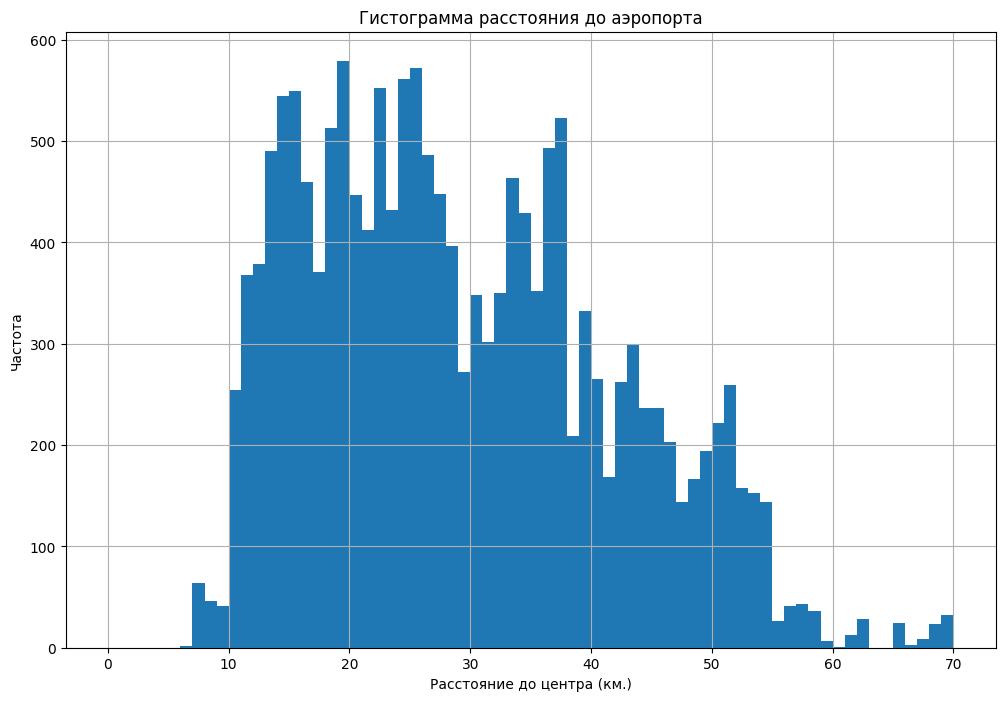

In [74]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма расстояния до аэропорта')
plt.xlabel('Расстояние до центра (км.)')
plt.ylabel('Частота')
df['dist_to_airport_km'].hist(bins=70, range=(0, 70))

## Расстояние до парка

Чаще всего расстояние до парка меньше 500 метров.

In [75]:
df['dist_to_park_m'].describe()

,dist_to_park_m
count,7336.00
mean,488.44
std,338.66
min,1.00
25%,288.00
50%,453.00
75%,611.00
max,3190.00


<Axes: title={'center': 'Гистограмма расстояния до ближайшего парка'}, xlabel='Расстояние до центра (км.)', ylabel='Частота'>

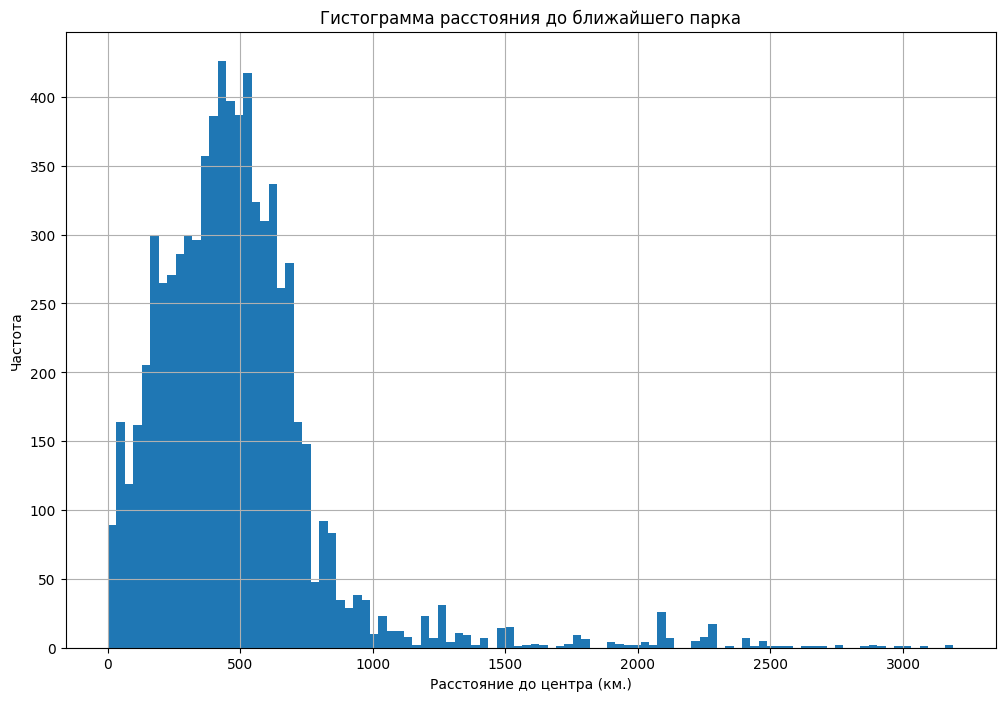

In [76]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма расстояния до ближайшего парка')
plt.xlabel('Расстояние до центра (км.)')
plt.ylabel('Частота')
df['dist_to_park_m'].hist(bins=100)

## День и месяц публикации

В будни публикуют объявления чаще. В понедельник меньше, чем в другие рабочие дни.

Самые активные месяцы - февраль, март. Самые неактивные - май и январь.

<Axes: title={'center': 'Гистограмма по дням публикации'}, xlabel='День недели', ylabel='Частота'>

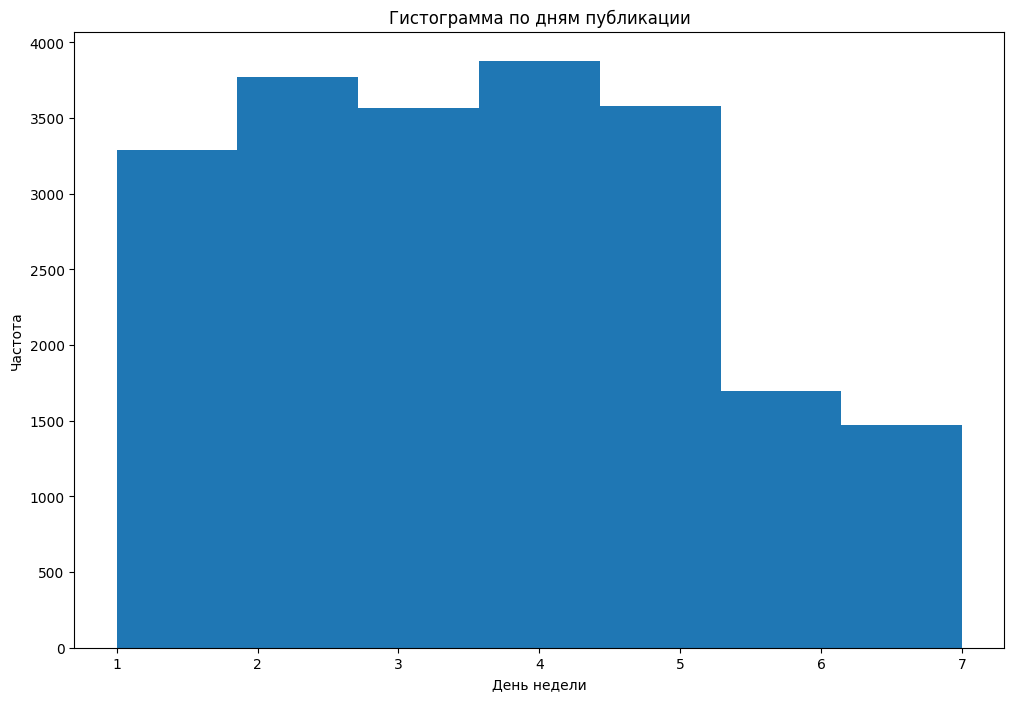

In [77]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма по дням публикации')
plt.xlabel('День недели')
plt.ylabel('Частота')
df['pub_dow'].hist(bins=7, grid=False)

In [78]:
df['pub_dow'].value_counts()

,count
pub_dow,
4,3877
2,3772
5,3582
3,3565
1,3287
6,1695
7,1473


In [79]:
df['pub_month'].value_counts()

,count
pub_month,
2,2335
3,2309
11,2179
4,2173
10,1952
9,1842
6,1596
8,1581
7,1497


## Срок размещения объявления

Медианный срок - 102 дня. Большинство объявлений активно от 45 до 239 дней.

Межквартильный размах 239-45=196.

Продажи дольше 102+196=298 дней можно считать долгими. Быстрыми продажами можно считать продажи быстрее 17 дней, которые составляют 10% от всех.

Есть пики на 45, 60, 7, 30 и 90 днях. Скорее всего, это связано с ограничением срока размещения объявления на сайте.

In [80]:
df['days_exposed'].describe()

,days_exposed
count,18293.00
mean,185.60
std,222.62
min,1.00
25%,45.00
50%,102.00
75%,239.00
max,1580.00


<Axes: title={'center': 'Гистограмма срока публикации'}, xlabel='Срок публикации (дни)', ylabel='Частота'>

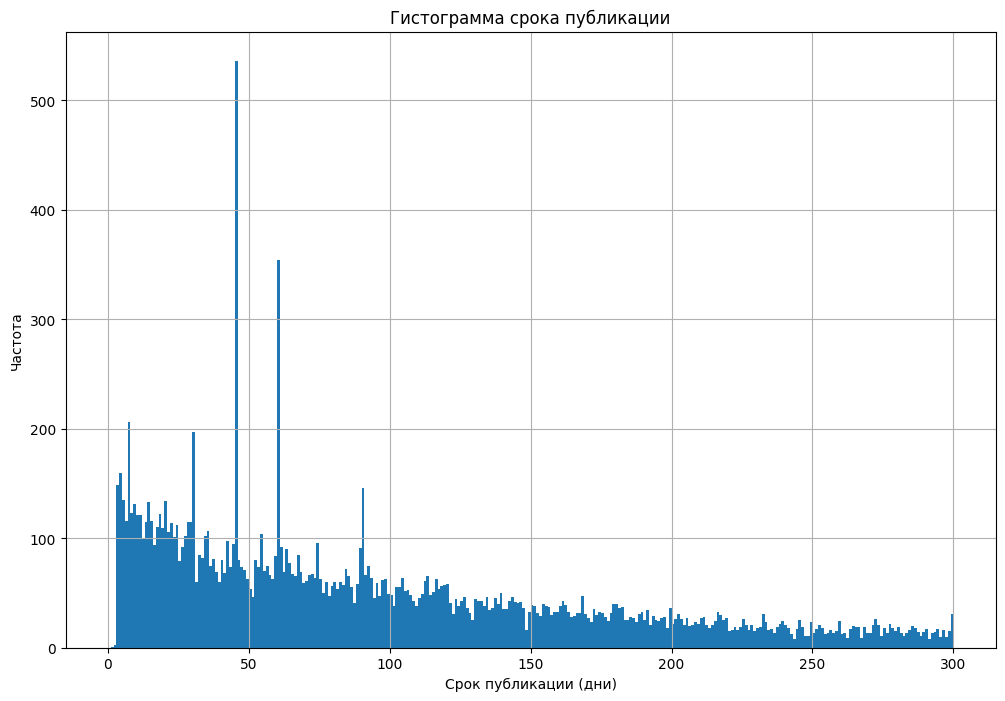

In [81]:
plt.figure(figsize=(12, 8))
plt.title('Гистограмма срока публикации')
plt.xlabel('Срок публикации (дни)')
plt.ylabel('Частота')
df['days_exposed'].hist(bins=300, range=(0, 300))

In [82]:
df['days_exposed'].value_counts().head(10)

,count
days_exposed,
45.00,536
60.00,354
7.00,206
30.00,197
4.00,160
3.00,149
90.00,146
5.00,135
20.00,134


In [83]:
'Квартиль 10% составляет {}'.format(df['days_exposed'].quantile(0.1))

'Квартиль 10% составляет 17.0'

## Факторы, больше влияющие на стоимость

Больше всего стоимость объекта связана с его площадью. Жилая площадь влияет на стоимость сильно, но чуть меньше.

Так как стоимость сильно зависит от площади, для оценки других факторов стоит использовать стоимость за квадратный метр.

Квартиры на первом этаже дешевле других. Квартиры на последнем этаже дороже, но больше ценятся квартиры на других этажах.

Зависимость от времени года слабая. От дня недели стоимость не зависит.

До 2014 года цены были выше. В 2015 наблюдается спад и дальнейший постепенный рост.

Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучите, зависит ли цена от:

    общей площади;
    жилой площади;
    площади кухни;
    количества комнат;
    этажа, на котором расположена квартира (первый, последний, другой);
    даты размещения (день недели, месяц, год).
    Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

In [84]:
print("Корреляция параметров с общей стоимость объекта:")
print("  общая площадь - {:.0%}".format(df['last_price'].corr(df['total_area_sqm'])))
print("  жилая площадь - {:.0%}".format(df['last_price'].corr(df['living_area_sqm'])))
print("  площадь кухни - {:.0%}".format(df['last_price'].corr(df['kitchen_area_sqm'])))
print("  количество комнат - {:.0%}".format(df['last_price'].corr(df['num_rooms'])))
print("  тип этажа - {:.0%}".format(df['last_price'].corr(df['floor_num'])))




Корреляция параметров с общей стоимость объекта:
  общая площадь - 70%
  жилая площадь - 61%
  площадь кухни - 52%
  количество комнат - 39%
  тип этажа - 3%


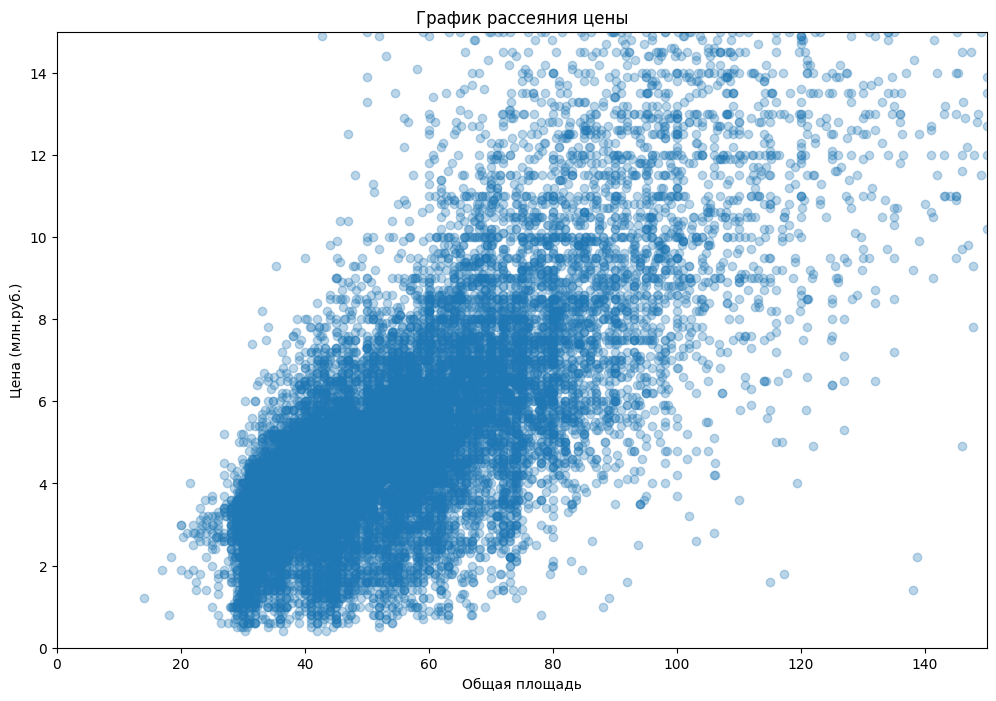

In [85]:
plt.figure(figsize=(12, 8))
plt.title('График рассеяния цены')
plt.xlabel('Общая площадь')
plt.xlim(0, 150)
plt.ylabel('Цена (млн.руб.)')
plt.ylim(0, 15)
plt.scatter(df['total_area_sqm'], df['price_mln'], alpha=0.3)
plt.show()

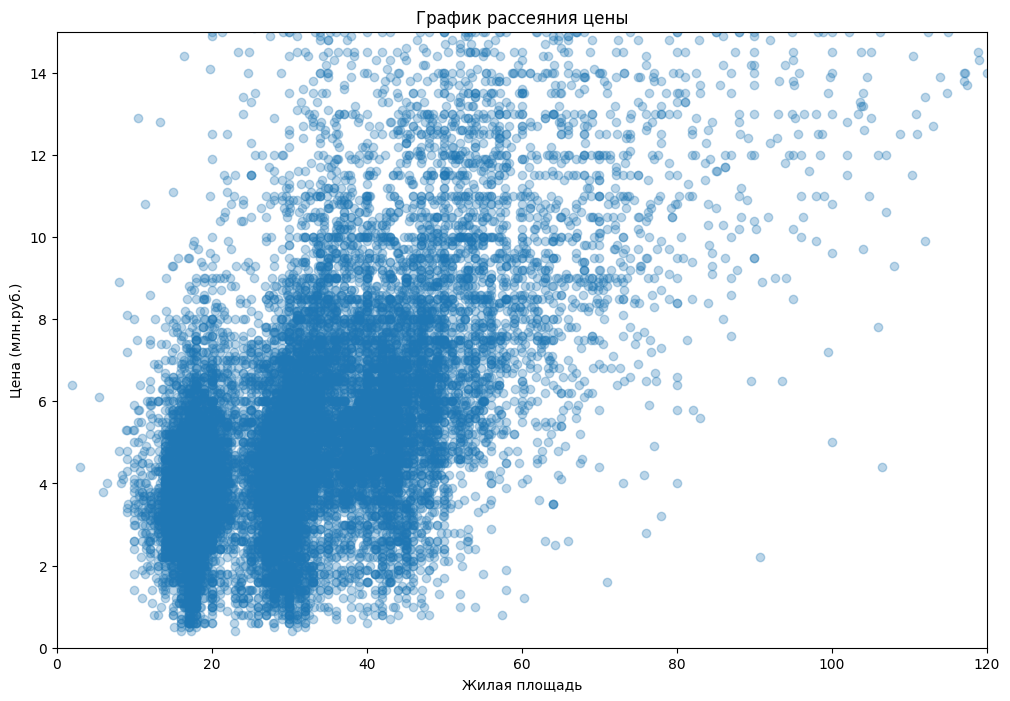

In [86]:
plt.figure(figsize=(12, 8))
plt.title('График рассеяния цены')
plt.xlabel('Жилая площадь')
plt.xlim(0, 120)
plt.ylabel('Цена (млн.руб.)')
plt.ylim(0, 15)
plt.scatter(df['living_area_sqm'], df['price_mln'], alpha=0.3)
plt.show()

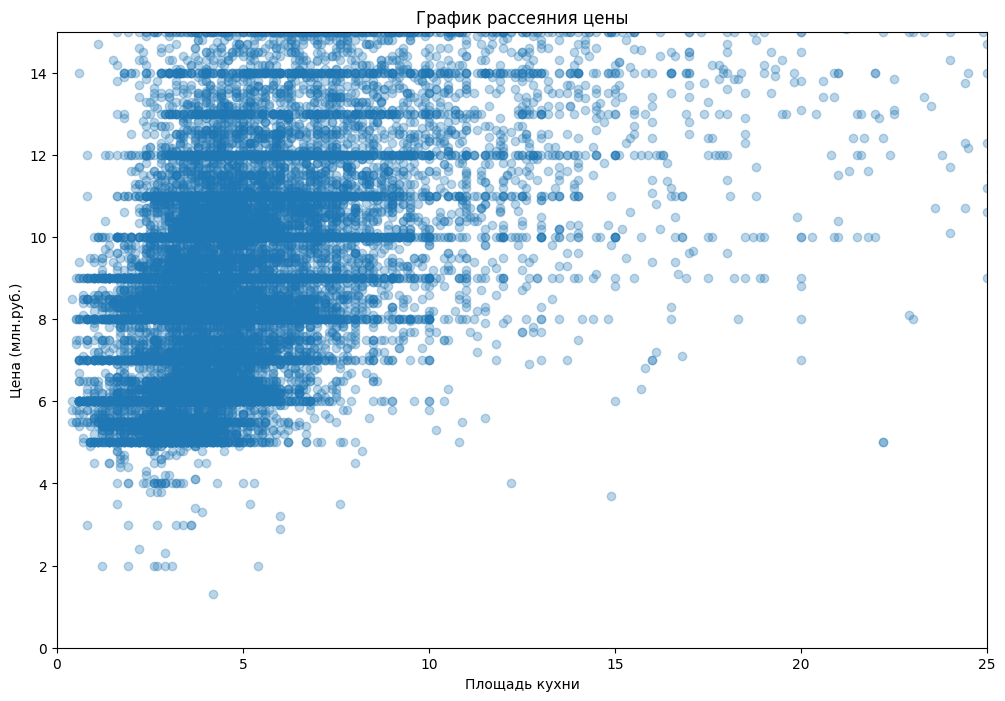

In [87]:
plt.figure(figsize=(12, 8))
plt.title('График рассеяния цены')
plt.xlabel('Площадь кухни')
plt.xlim(0, 25)
plt.ylabel('Цена (млн.руб.)')
plt.ylim(0, 15)
plt.scatter(df['price_mln'], df['kitchen_area_sqm'], alpha=0.3)
plt.show()

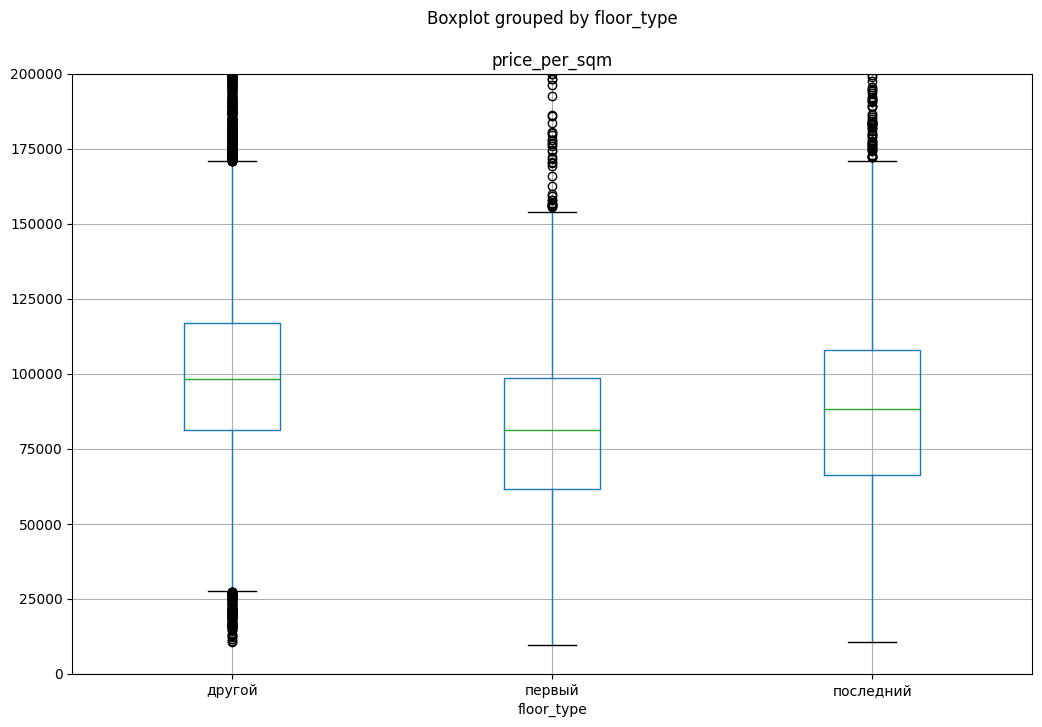

In [88]:
plot = df.boxplot('price_per_sqm', by='floor_type', figsize=(12,8)).set_ylim(0,200000)

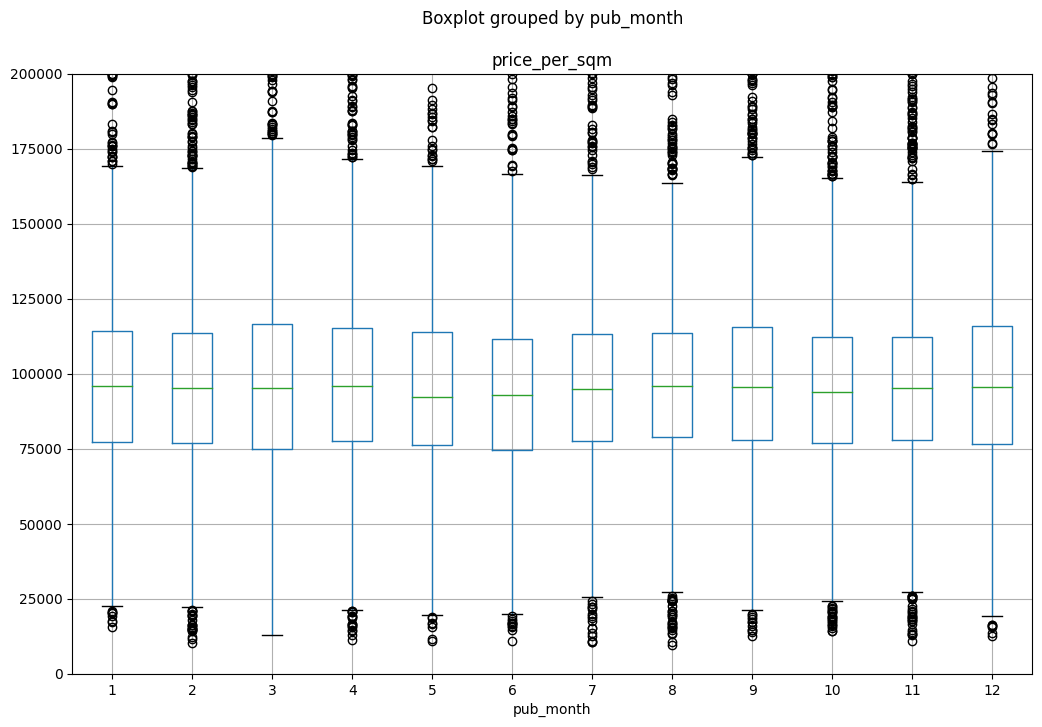

In [89]:
plot = df.boxplot('price_per_sqm', by='pub_month', figsize=(12,8)).set_ylim(0,200000)

In [90]:
df.pivot_table(index='floor_type', values='price_per_sqm', aggfunc='median')

,price_per_sqm
floor_type,
другой,98207.16
первый,81355.93
последний,88061.39


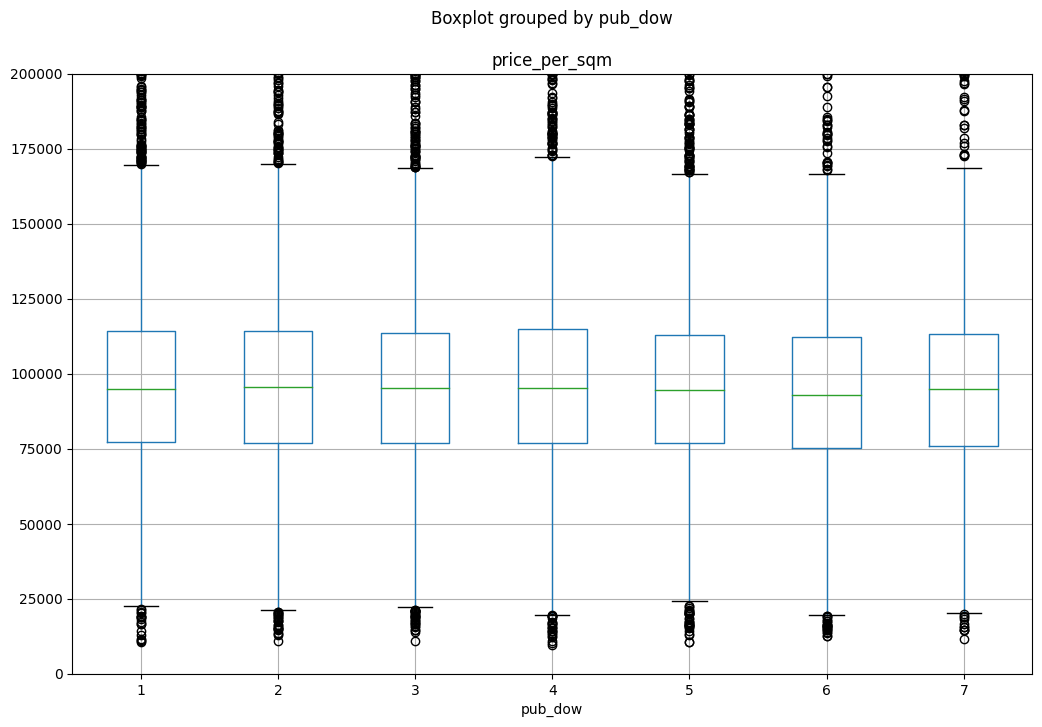

In [91]:
plot = df.boxplot('price_per_sqm', by='pub_dow', figsize=(12,8)).set_ylim(0,200000)

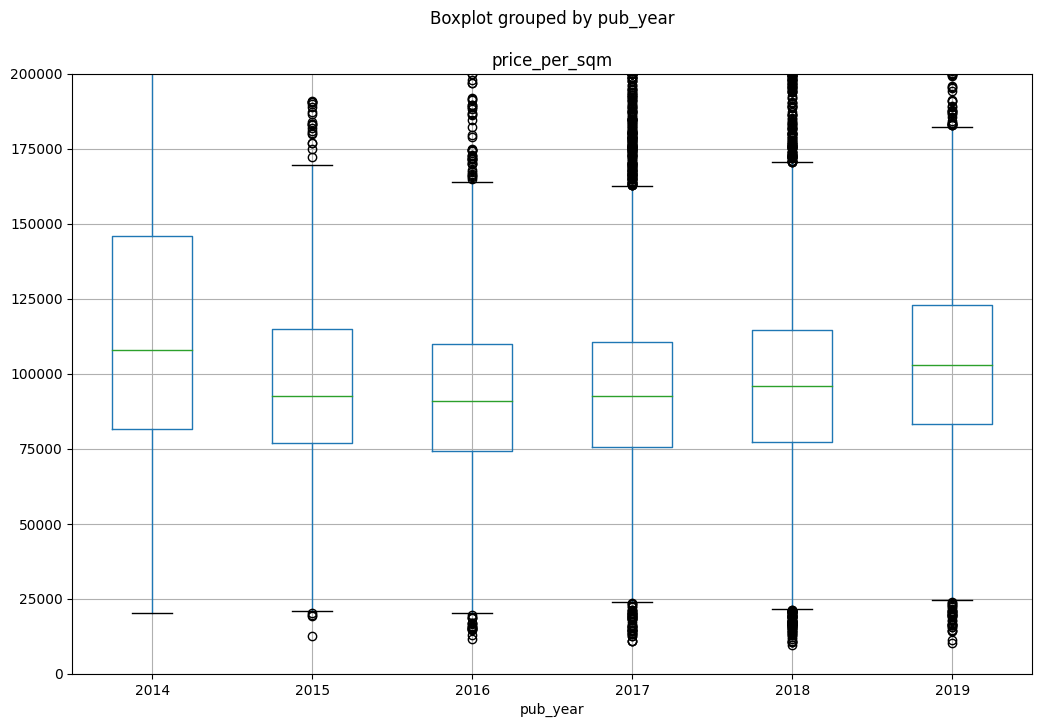

In [92]:
plot = df.boxplot('price_per_sqm', by='pub_year', figsize=(12,8)).set_ylim(0,200000)

## Средняя цена в 10 населенных пунктах

Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений составляет 82017 руб.

Дороже всего в Санкт-Петербурге и Пушкине, дешевле всего в Выборге.

In [93]:
price_10 = df.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count', 'median'])
price_10 = price_10.sort_values(by=('count', 'price_per_sqm'), ascending=False).head(10)
price_10 = price_10.reset_index()
price_10 = price_10.sort_values(by=('median', 'price_per_sqm'), ascending=False)
price_10.columns = ['Название населенного пункта', 'Количество объявлений', 'Медианная цена за кв.м']
price_10

,Название населенного пункта,Количество объявлений,Медианная цена за кв.м
0,Санкт-Петербург,14253,104411.76
5,Пушкин,338,100000.00
3,Кудрово,386,95555.31
8,поселок Парголово,288,92202.38
1,Мурино,476,84801.38
2,поселок Шушары,396,77048.49
6,Колпино,321,74725.27
7,Гатчина,290,67671.51
4,Всеволожск,353,65789.47
9,Выборг,198,58546.82


In [94]:
"Средняя цена квадратного метра в 10 населенных пунктах {:.0f} руб.".format(price_10['Медианная цена за кв.м'].mean())

'Средняя цена квадратного метра в 10 населенных пунктах 82075 руб.'

## Цена километра

Рассматриваем квартиры в Санкт-Петербурге. С ростом расстояния от центра цена квадратного метра снижается. Разница в стоимости первого и последнего километра 70%.

In [95]:
price_km = df[(df['locality_name'] == 'Санкт-Петербург') & (df['dist_to_center_km'].notna())].pivot_table(index='dist_to_center_km', values='price_per_sqm', aggfunc='median')
price_km

,price_per_sqm
dist_to_center_km,
0.00,172619.05
1.00,127731.09
2.00,122047.24
3.00,108055.56
4.00,116624.18
5.00,126925.36
6.00,127887.91
7.00,126226.36
8.00,122781.99


<Axes: xlabel='dist_to_center_km'>

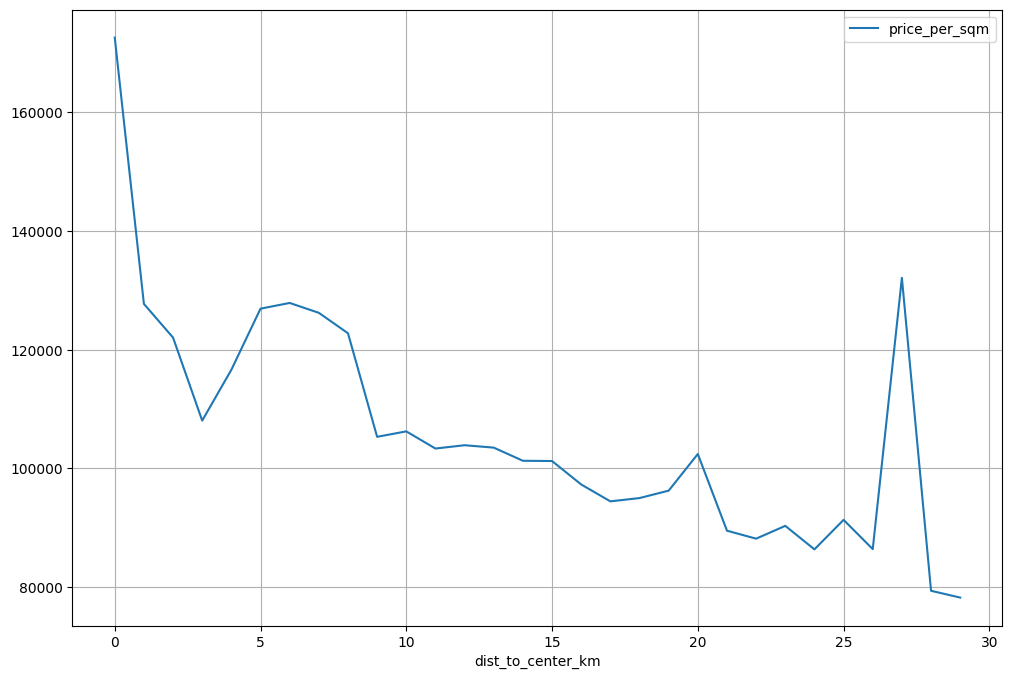

In [96]:
price_km.plot(kind='line', figsize=(12, 8), grid=True)

(0.0, 200000.0)

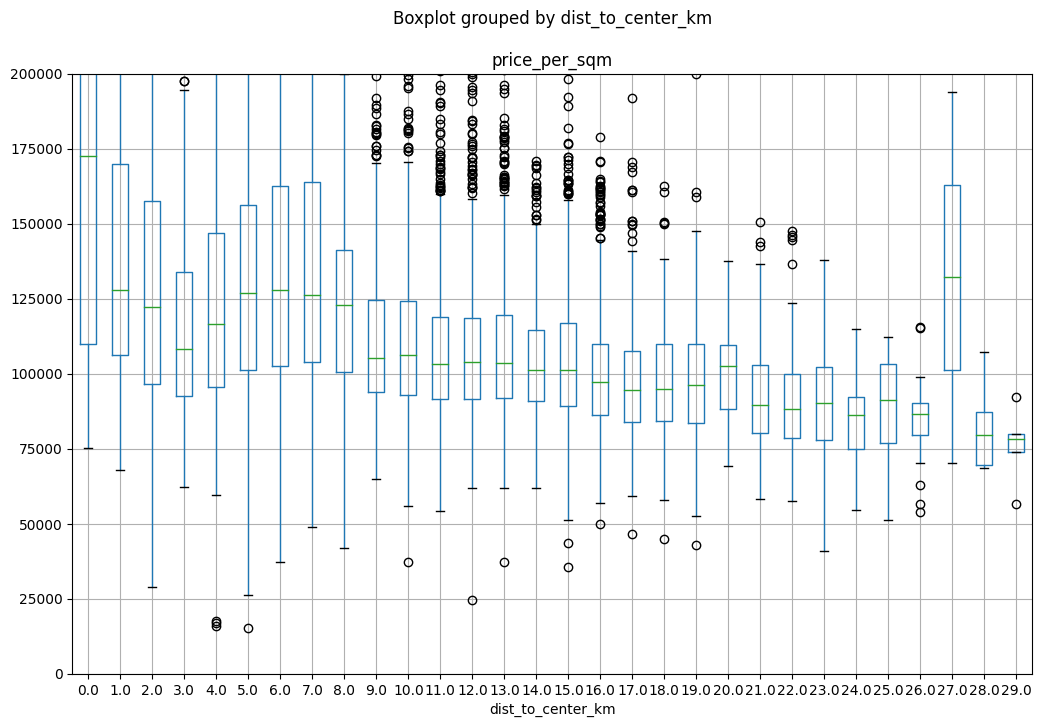

In [97]:
df[(df['locality_name'] == 'Санкт-Петербург') & (df['dist_to_center_km'].notna())].boxplot('price_per_sqm', by='dist_to_center_km', figsize=(12,8)).set_ylim(0,200000)

# Общий вывод

В ходе работы были проанализированы данные о продаже квартир в Санкт-Петербурге и Ленинградской области **за период с 2014 по 2019 год**.
Исходный массив данных содержит **23699 записей** о квартирах с различными характеристиками, такими как площадь, цена, количество комнат, этаж и т.д.


**В результате предобработки данных:**
- Были скорректированы названия и типы данных в столбцах.
- Удалены дубликаты и пропуски в данных.
- Обработаны аномальные значения.
- Добавлены новые столбцы для удобства анализа (например, цена за квадратный метр, тип этажа).

**Основные выводы по итогам анализа:**
- Наиболее популярны однокомнатные и двухкомнатные квартиры.
- Цена квартиры в первую очередь зависит от общей площади, а также от жилой площади, количества комнат и удаленности от центра города.
- Квартиры на первом этаже, как правило, дешевле, чем на других этажах.
- Наблюдается снижение цен на квартиры в 2015 году, после чего цены начали постепенно расти.
- Самые дорогие квартиры находятся в Санкт-Петербурге и Пушкине, самые дешевые - в Выборге.
- В Санкт-Петербурге стоимость квартир снижается по мере удаления от центра города.